In [16]:
# =======================================================
# Crypto Technical Indicators Calculator - Fixed
# =======================================================

import pandas as pd
import os
import ta  # pip install ta

# =========================
# CONFIG
# =========================
DATA_FOLDER = r"C:\Users\moham\Downloads\scrape\main\crypto_project\data\raw\ten_main_crytpo_10-12-2025"
OUTPUT_FILE = r"C:\Users\moham\Downloads\scrape\main\crypto_project\data\processed\crypto_tech_indicators_1.csv"

# List of CSV files (assumes all CSVs are named like TICKER_daily_history.csv)
csv_files = [f for f in os.listdir(DATA_FOLDER) if f.endswith("_daily_history.csv")]

all_data = []

# =========================
# Function to calculate indicators
# =========================
def calculate_indicators(df):
    # Ensure numeric columns
    for col in ['Open', 'High', 'Low', 'Close', 'Volume']:
        df[col] = pd.to_numeric(df[col], errors='coerce')

    # EMA
    df['EMA_200'] = ta.trend.EMAIndicator(close=df['Close'], window=200, fillna=True).ema_indicator()
    df['EMA_50'] = ta.trend.EMAIndicator(close=df['Close'], window=50, fillna=True).ema_indicator()
    df['EMA_20'] = ta.trend.EMAIndicator(close=df['Close'], window=20, fillna=True).ema_indicator()

    # RSI
    df['RSI_14'] = ta.momentum.RSIIndicator(close=df['Close'], window=14, fillna=True).rsi()

    # ATR
    df['ATR'] = ta.volatility.AverageTrueRange(high=df['High'], low=df['Low'], close=df['Close'], window=14, fillna=True).average_true_range()
    df['ATR_pct'] = df['ATR'] / df['Close'] * 100

    # Volume ratio: Current Volume / 20-day SMA of Volume
    df['Vol_SMA_20'] = df['Volume'].rolling(window=20, min_periods=1).mean()
    df['Vol_Ratio'] = df['Volume'] / df['Vol_SMA_20']

    # MACD
    macd = ta.trend.MACD(close=df['Close'], window_slow=26, window_fast=12, window_sign=9, fillna=True)
    df['MACD'] = macd.macd()
    df['MACD_signal'] = macd.macd_signal()
    df['MACD_diff'] = macd.macd_diff()

    return df

# =========================
# Process each CSV
# =========================
for file in csv_files:
    file_path = os.path.join(DATA_FOLDER, file)

    # Read CSV, skip ticker row if present
    df = pd.read_csv(file_path, skiprows=1)

    # Rename columns correctly
    df.columns = ['Date','Close','High','Low','Open','Volume']

    # Drop empty or invalid rows
    df = df.dropna(subset=['Date','Close','High','Low','Open','Volume']).reset_index(drop=True)

    # Convert date
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
    df = df.dropna(subset=['Date'])

    # Reorder columns to OHLCV (important for ta library)
    df = df[['Date','Open','High','Low','Close','Volume']]

    # Sort by date
    df = df.sort_values('Date').reset_index(drop=True)

    # Extract ticker from filename
    ticker = file.split("_")[0]

    print(f"Calculating indicators for {ticker}...")

    # Calculate indicators
    df = calculate_indicators(df)

    # Add Ticker column
    df['Ticker'] = ticker

    all_data.append(df)

# =========================
# Combine all data
# =========================
final_df = pd.concat(all_data, axis=0, ignore_index=True)

# Reorder columns
cols = ['Date','Ticker','Open','High','Low','Close','Volume',
        'EMA_200','EMA_50','EMA_20','RSI_14','ATR','ATR_pct',
        'Vol_SMA_20','Vol_Ratio','MACD','MACD_signal','MACD_diff']

final_df = final_df[cols]

# Save to CSV
os.makedirs(os.path.dirname(OUTPUT_FILE), exist_ok=True)
final_df.to_csv(OUTPUT_FILE, index=False)

print(f"\nAll crypto indicators saved to: {OUTPUT_FILE}")


Calculating indicators for ADA-USD...
Calculating indicators for AVAX-USD...
Calculating indicators for BNB-USD...
Calculating indicators for BTC-USD...
Calculating indicators for DOT-USD...
Calculating indicators for ETH-USD...
Calculating indicators for MATIC-USD...
Calculating indicators for SOL-USD...
Calculating indicators for USDT-USD...
Calculating indicators for XRP-USD...

All crypto indicators saved to: C:\Users\moham\Downloads\scrape\main\crypto_project\data\processed\crypto_tech_indicators_1.csv


C:\Users\moham\AppData\Local\Temp\ipykernel_28908\912293076.py:68: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


In [17]:
display(final_df.head(10))

,Date,Ticker,Open,High,Low,Close,Volume,EMA_200,EMA_50,EMA_20,RSI_14,ATR,ATR_pct,Vol_SMA_20,Vol_Ratio,MACD,MACD_signal,MACD_diff
0,2023-11-23,ADA-USD,0.380676,0.387142,0.378037,0.386675,241703105.000000,0.386675,0.386675,0.386675,100.000000,0.000000,0.000000,241703105.000000,1.000000,0.000000,0.000000,0.000000
1,2023-11-24,ADA-USD,0.386695,0.397344,0.384995,0.386213,350870124.000000,0.386670,0.386657,0.386631,0.000000,0.000000,0.000000,296286614.500000,1.184225,-0.000037,-0.000007,-0.000029
2,2023-11-25,ADA-USD,0.386220,0.395703,0.385702,0.394811,215322275.000000,0.386751,0.386977,0.387410,95.247634,0.000000,0.000000,269298501.333333,0.799567,0.000621,0.000118,0.000502
3,2023-11-26,ADA-USD,0.394788,0.395569,0.381164,0.388185,234557830.000000,0.386766,0.387024,0.387484,53.196560,0.000000,0.000000,260613333.500000,0.900022,0.000600,0.000215,0.000385
4,2023-11-27,ADA-USD,0.388113,0.391786,0.372034,0.378359,254570208.000000,0.386682,0.386684,0.386615,31.199042,0.000000,0.000000,259404708.400000,0.981363,-0.000207,0.000130,-0.000337
5,2023-11-28,ADA-USD,0.378341,0.388115,0.370489,0.385624,273962828.000000,0.386671,0.386643,0.386520,48.240999,0.000000,0.000000,261831061.666667,1.046334,-0.000257,0.000053,-0.000310
6,2023-11-29,ADA-USD,0.385633,0.388801,0.378548,0.381776,256880751.000000,0.386623,0.386452,0.386069,42.268882,0.000000,0.000000,261123874.428571,0.983751,-0.000600,-0.000078,-0.000523
7,2023-11-30,ADA-USD,0.381803,0.382576,0.372702,0.375895,267025029.000000,0.386516,0.386038,0.385100,35.114097,0.000000,0.000000,261861518.750000,1.019718,-0.001332,-0.000329,-0.001003
8,2023-12-01,ADA-USD,0.375891,0.385247,0.374483,0.384202,248849205.000000,0.386493,0.385966,0.385014,48.400289,0.000000,0.000000,260415706.111111,0.955584,-0.001227,-0.000508,-0.000719
9,2023-12-02,ADA-USD,0.384204,0.397844,0.383415,0.397798,255637811.000000,0.386605,0.386430,0.386232,62.084459,0.000000,0.000000,259937916.600000,0.983457,-0.000046,-0.000416,0.000370


In [19]:
final_df.shape

(7220, 18)

In [20]:
# Save as compute_signals.py and run with the same venv where pandas/ numpy are installed
import pandas as pd
import numpy as np
import os

# ---------- CONFIG ----------
INPUT_FILE = r"C:\Users\moham\Downloads\scrape\main\crypto_project\data\processed\crypto_tech_indicators.csv"
OUTPUT_FILE = r"C:\Users\moham\Downloads\scrape\main\crypto_project\data\processed\crypto_trade_signals.csv"
TIMEFRAME = "1d"   # daily data

# ---------- helpers ----------
eps = 1e-9

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def clamp01(x):
    return float(np.minimum(np.maximum(x, 0.0), 1.0))

def compute_confidence(row):
    close = float(row.get("Close", np.nan) or np.nan)
    ema20 = float(row.get("EMA_20", np.nan) or np.nan)
    macd = float(row.get("MACD", 0.0) or 0.0)
    rsi = float(row.get("RSI_14", 50.0) or 50.0)
    vol_ratio = float(row.get("Vol_Ratio", 1.0) or 1.0)

    # trend score
    if np.isnan(close) or np.isnan(ema20):
        trend_score = 0.5
    else:
        rel = (close - ema20) / (ema20 + eps)
        trend_score = sigmoid(rel * 6.0)
        trend_score = clamp01(trend_score)

    # macd score
    macd_score = clamp01(abs(macd) / (abs(close) + eps))
    # rsi score
    rsi_score = 1.0 - (abs(rsi - 50.0) / 50.0)
    rsi_score = clamp01(rsi_score)
    # volume score
    vol_score = clamp01(vol_ratio / 3.0)

    # weighted combination
    w_trend, w_macd, w_rsi, w_vol = 0.35, 0.25, 0.20, 0.20
    conf = (w_trend*trend_score + w_macd*macd_score + w_rsi*rsi_score + w_vol*vol_score)
    return clamp01(conf)

def decide_signal(row):
    close = row.get("Close", np.nan)
    ema20 = row.get("EMA_20", np.nan)
    macd = row.get("MACD", np.nan)
    rsi = row.get("RSI_14", np.nan)

    if pd.isna(close) or pd.isna(ema20) or pd.isna(macd) or pd.isna(rsi):
        return "Hold"

    if (close > ema20) and (macd > 0) and (rsi < 70):
        return "Buy"
    if (close < ema20) and (macd < 0) and (rsi > 30):
        return "Sell"
    return "Hold"

# ---------- main ----------
if not os.path.exists(INPUT_FILE):
    raise FileNotFoundError(f"Input file not found: {INPUT_FILE}")

df = pd.read_csv(INPUT_FILE, parse_dates=["Date"], dayfirst=False, infer_datetime_format=True)

# Keep last available row per ticker
df = df.sort_values(["Ticker", "Date"])
last_rows = df.groupby("Ticker", as_index=False).last()

out_rows = []
for _, r in last_rows.iterrows():
    ticker = r['Ticker']
    last_close = float(r.get("Close", np.nan) or np.nan)  # use Close price
    last_candle_price = last_close  # also Close price
    confidence = compute_confidence(r)
    signal = decide_signal(r)

    atr = r.get("ATR", np.nan)
    if pd.isna(atr) or atr == 0:
        atr_val = max(abs(last_close)*0.01, eps)
    else:
        atr_val = float(atr)

    if signal == "Buy":
        sl = last_close - 2 * atr_val
        tp = last_close + 3 * atr_val
    elif signal == "Sell":
        sl = last_close + 2 * atr_val
        tp = last_close - 3 * atr_val
    else:  # Hold
        sl = last_close - 1 * atr_val
        tp = last_close + 1 * atr_val

    out_rows.append({
        "Ticker": ticker,
        "Timeframe": TIMEFRAME,
        "Live_Price": round(last_close, 8),
        "Last_Candle_Close": round(last_candle_price, 8),
        "Confidence": round(confidence, 4),
        "Signal": signal,
        "SL": round(sl, 8),
        "TP": round(tp, 8),
        "EMA_20": round(r.get("EMA_20", np.nan), 8) if not pd.isna(r.get("EMA_20", np.nan)) else np.nan,
        "MACD": round(r.get("MACD", np.nan), 8) if not pd.isna(r.get("MACD", np.nan)) else np.nan,
        "RSI_14": round(r.get("RSI_14", np.nan), 4) if not pd.isna(r.get("RSI_14", np.nan)) else np.nan,
        "ATR": round(r.get("ATR", np.nan), 8) if not pd.isna(r.get("ATR", np.nan)) else np.nan,
        "Vol_Ratio": round(r.get("Vol_Ratio", np.nan), 4) if not pd.isna(r.get("Vol_Ratio", np.nan)) else np.nan,
    })

out_df = pd.DataFrame(out_rows)

# Save CSV
os.makedirs(os.path.dirname(OUTPUT_FILE), exist_ok=True)
out_df.to_csv(OUTPUT_FILE, index=False)

# Display nicely
pd.set_option("display.float_format", "{:.6f}".format)
print("\n--- Trade suggestions (latest per ticker) ---\n")
print(out_df[["Ticker","Timeframe","Live_Price","Last_Candle_Close","Confidence","Signal","SL","TP"]].to_string(index=False))
print(f"\nSaved signals to: {OUTPUT_FILE}\n")



--- Trade suggestions (latest per ticker) ---

   Ticker Timeframe   Live_Price  Last_Candle_Close  Confidence Signal           SL           TP
  ADA-USD        1d     0.470005           0.470005    0.531200   Hold     0.439429     0.500581
 AVAX-USD        1d    14.605246          14.605246    0.468600   Hold    13.689593    15.520898
  BNB-USD        1d   898.810425         898.810425    0.445600   Hold   858.860096   938.760754
  BTC-USD        1d 92691.710938       92691.710938    0.453600   Hold 89001.241567 96382.180308
  DOT-USD        1d     2.291781           2.291781    0.459900   Sell     2.632018     1.781426
  ETH-USD        1d  3321.114990        3321.114990    0.468100   Hold  3134.411285  3507.818696
MATIC-USD        1d     0.216415           0.216415    0.342400   Sell     0.244777     0.173871
  SOL-USD        1d   137.901611         137.901611    0.450000   Sell   155.843395   110.988936
 USDT-USD        1d     1.000085           1.000085    0.439700    Buy     0.99

C:\Users\moham\AppData\Local\Temp\ipykernel_28908\3345849711.py:67: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df = pd.read_csv(INPUT_FILE, parse_dates=["Date"], dayfirst=False, infer_datetime_format=True)


c:\Users\moham\Downloads\scrape\main\crypto_project\venv\Lib\site-packages\torch\nn\modules\transformer.py:392: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.num_heads is odd
  warnings.warn(


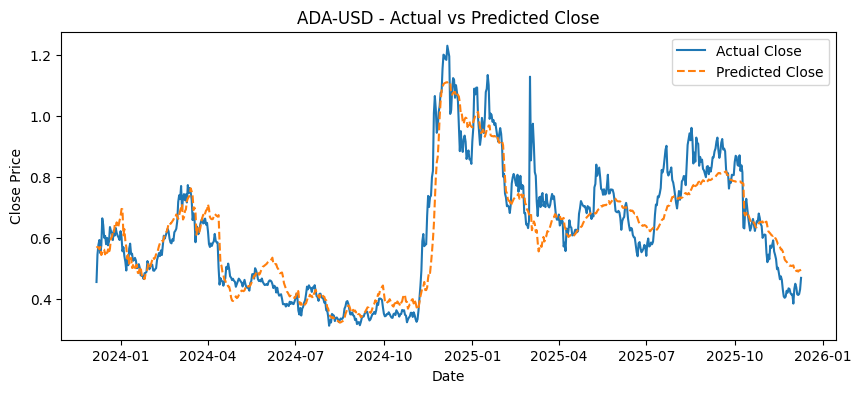

c:\Users\moham\Downloads\scrape\main\crypto_project\venv\Lib\site-packages\torch\nn\modules\transformer.py:392: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.num_heads is odd
  warnings.warn(


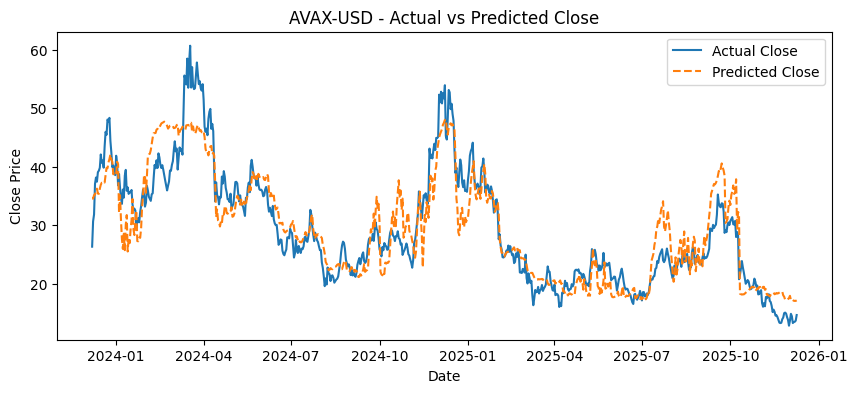

c:\Users\moham\Downloads\scrape\main\crypto_project\venv\Lib\site-packages\torch\nn\modules\transformer.py:392: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.num_heads is odd
  warnings.warn(


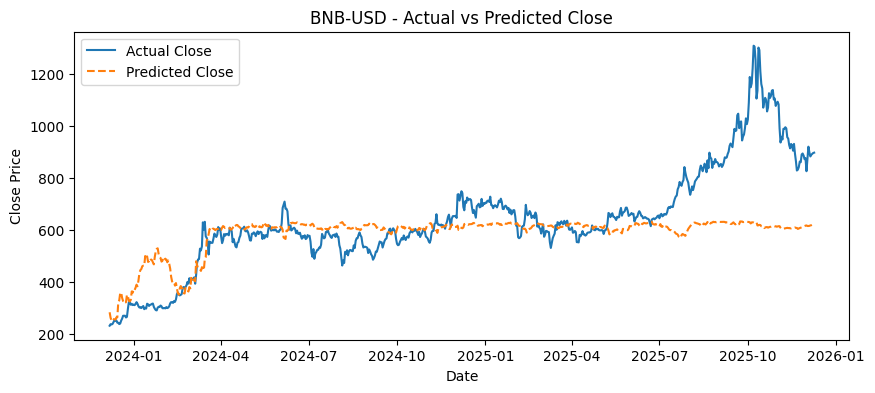

C:\Users\moham\AppData\Local\Temp\ipykernel_28908\4191566248.py:74: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df = pd.read_csv(os.path.join(DATA_FOLDER, file), parse_dates=['Date'])
c:\Users\moham\Downloads\scrape\main\crypto_project\venv\Lib\site-packages\torch\nn\modules\transformer.py:392: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.num_heads is odd
  warnings.warn(


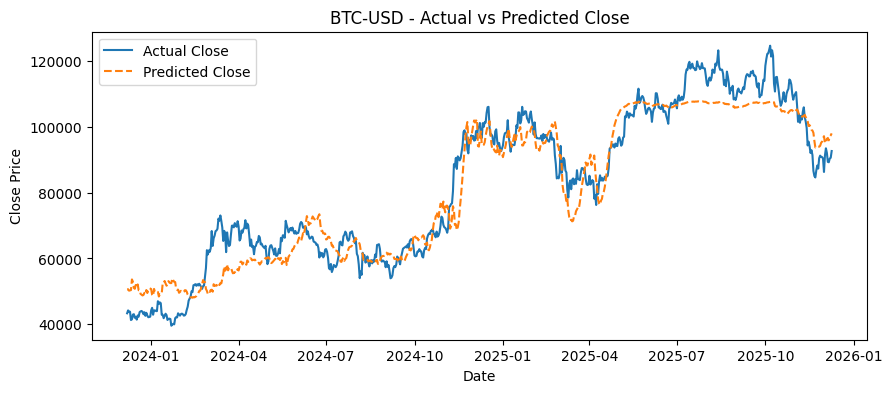

c:\Users\moham\Downloads\scrape\main\crypto_project\venv\Lib\site-packages\torch\nn\modules\transformer.py:392: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.num_heads is odd
  warnings.warn(


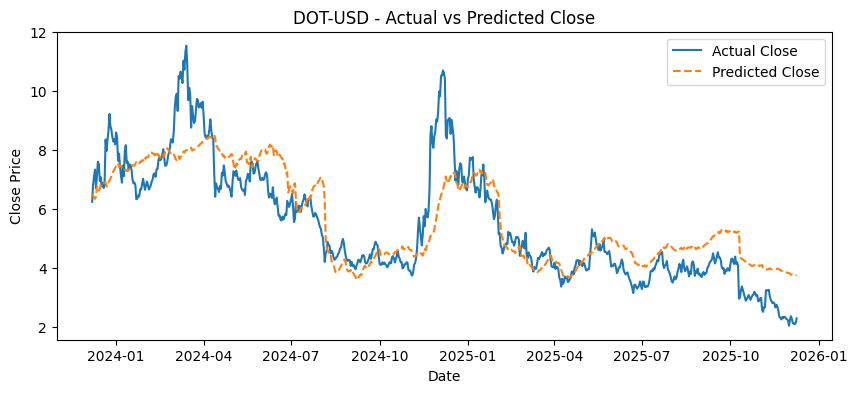

c:\Users\moham\Downloads\scrape\main\crypto_project\venv\Lib\site-packages\torch\nn\modules\transformer.py:392: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.num_heads is odd
  warnings.warn(


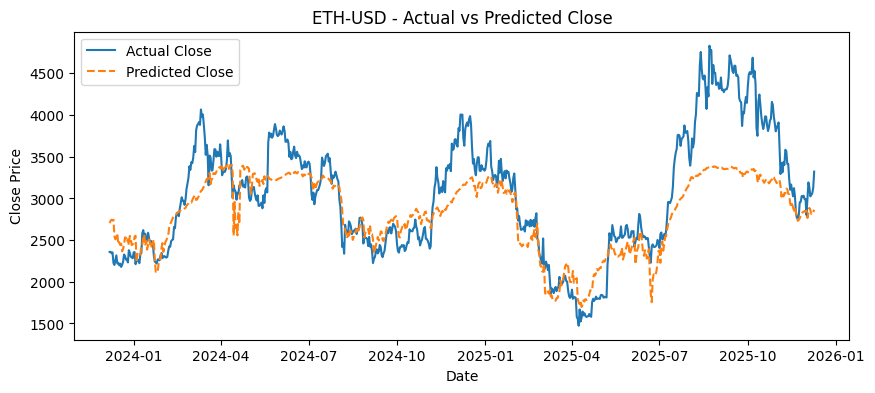

c:\Users\moham\Downloads\scrape\main\crypto_project\venv\Lib\site-packages\torch\nn\modules\transformer.py:392: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.num_heads is odd
  warnings.warn(


: 

In [27]:
import os
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import ta  # pip install ta

# ------------------------------
# CONFIG
# ------------------------------
DATA_FOLDER = r"C:\Users\moham\Downloads\scrape\main\crypto_project\data\raw\ten_main_crytpo_10-12-2025"
FEATURES = ['EMA_200', 'RSI_14', 'EMA_50', 'EMA_20', 'ATR_pct']
TARGET = 'Close'
SEQ_LEN = 14
EPOCHS = 50
LR = 0.001
DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'

# ------------------------------
# Transformer Model
# ------------------------------
class TimeSeriesTransformer(nn.Module):
    def __init__(self, feature_size, seq_len=SEQ_LEN, num_layers=2, nhead=1, dropout=0.1):
        super(TimeSeriesTransformer, self).__init__()
        self.feature_size = feature_size
        self.seq_len = seq_len
        self.pos_encoder = nn.Parameter(torch.zeros(seq_len, feature_size))
        encoder_layer = nn.TransformerEncoderLayer(d_model=feature_size, nhead=nhead, dropout=dropout, batch_first=True)
        self.transformer_encoder = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)
        self.decoder = nn.Linear(feature_size, 1)

    def forward(self, x):
        x = x + self.pos_encoder
        x = self.transformer_encoder(x)
        output = self.decoder(x[:, -1, :])
        return output

# ------------------------------
# Calculate indicators
# ------------------------------
def calculate_indicators(df):
    for col in ['Open','High','Low','Close','Volume']:
        df[col] = pd.to_numeric(df[col], errors='coerce')

    df['EMA_200'] = ta.trend.EMAIndicator(df['Close'], 200, fillna=True).ema_indicator()
    df['EMA_50'] = ta.trend.EMAIndicator(df['Close'], 50, fillna=True).ema_indicator()
    df['EMA_20'] = ta.trend.EMAIndicator(df['Close'], 20, fillna=True).ema_indicator()
    df['RSI_14'] = ta.momentum.RSIIndicator(df['Close'], 14, fillna=True).rsi()
    df['ATR'] = ta.volatility.AverageTrueRange(df['High'], df['Low'], df['Close'], 14, fillna=True).average_true_range()
    df['ATR_pct'] = df['ATR'] / df['Close'] * 100
    return df

# ------------------------------
# Prepare sequences
# ------------------------------
def create_sequences(data, seq_len=SEQ_LEN):
    xs, ys = [], []
    for i in range(len(data) - seq_len):
        xs.append(data[i:i+seq_len])
        ys.append(data[i+seq_len, 0])
    return np.array(xs), np.array(ys)

# ------------------------------
# Process all crypto files
# ------------------------------
crypto_files = [f for f in os.listdir(DATA_FOLDER) if f.endswith("_daily_history.csv")]
next_day_predictions = []

for file in crypto_files:
    crypto_name = file.replace("_daily_history.csv","")
    df = pd.read_csv(os.path.join(DATA_FOLDER, file), parse_dates=['Date'])
    df = df.sort_values('Date')

    # Calculate indicators
    df = calculate_indicators(df)
    df = df.dropna(subset=FEATURES + [TARGET])

    # Scale
    scaler_x = MinMaxScaler()
    scaler_y = MinMaxScaler()
    X_scaled = scaler_x.fit_transform(df[FEATURES])
    y_scaled = scaler_y.fit_transform(df[[TARGET]])

    data_combined = np.hstack([y_scaled, X_scaled])
    X_seq, y_seq = create_sequences(data_combined, SEQ_LEN)
    X_seq = X_seq[:, :, 1:]  # only features

    # Train/test split
    X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.2, shuffle=False)
    X_train = torch.tensor(X_train, dtype=torch.float32).to(DEVICE)
    y_train = torch.tensor(y_train, dtype=torch.float32).unsqueeze(-1).to(DEVICE)
    X_test = torch.tensor(X_test, dtype=torch.float32).to(DEVICE)
    y_test = torch.tensor(y_test, dtype=torch.float32).unsqueeze(-1).to(DEVICE)

    # Train model
    model = TimeSeriesTransformer(feature_size=len(FEATURES)).to(DEVICE)
    criterion = nn.MSELoss()
    optimizer = torch.optim.AdamW(model.parameters(), lr=LR)

    for epoch in range(EPOCHS):
        model.train()
        optimizer.zero_grad()
        output = model(X_train)
        loss = criterion(output, y_train)
        loss.backward()
        optimizer.step()

    # Predict next day
    model.eval()
    last_seq = X_seq[-1:]
    with torch.no_grad():
        seq = torch.tensor(last_seq, dtype=torch.float32).to(DEVICE)
        pred_scaled = model(seq).cpu().numpy()
    pred_next = scaler_y.inverse_transform(np.array(pred_scaled).reshape(-1,1))[0][0]
    next_day_predictions.append({'Crypto': crypto_name, 'Next_Day_Prediction': pred_next})

    # Plot actual vs predicted (historical)
    model.eval()
    with torch.no_grad():
        seq_all = torch.tensor(X_seq, dtype=torch.float32).to(DEVICE)
        preds_scaled = model(seq_all).cpu().numpy()
    preds = scaler_y.inverse_transform(preds_scaled).flatten()
    actual = df[TARGET].values[SEQ_LEN:]
    dates_hist = df['Date'].values[SEQ_LEN:]

    plt.figure(figsize=(10,4))
    plt.plot(dates_hist, actual, label='Actual Close')
    plt.plot(dates_hist, preds, label='Predicted Close', linestyle='--')
    plt.title(f'{crypto_name} - Actual vs Predicted Close')
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.legend()
    plt.show()

# ------------------------------
# Next day predictions
# ------------------------------
pred_df = pd.DataFrame(next_day_predictions)
print(pred_df)


### ADA-USD using Transformer

In [ ]:
import os
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import ta  # pip install ta

# ------------------------------
# CONFIG
# ------------------------------
DATA_FOLDER = r"C:\Users\moham\Downloads\scrape\main\crypto_project\data\raw\ten_main_crytpo_10-12-2025"
FEATURES = ['EMA_200', 'RSI_14', 'EMA_50', 'EMA_20', 'ATR_pct']
TARGET = 'Close'
SEQ_LEN = 14
EPOCHS = 50
LR = 0.001
DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'

# ------------------------------
# Transformer Model
# ------------------------------
class TimeSeriesTransformer(nn.Module):
    def __init__(self, feature_size, seq_len=SEQ_LEN, num_layers=2, nhead=1, dropout=0.1):
        super().__init__()
        self.pos_encoder = nn.Parameter(torch.zeros(seq_len, feature_size))
        encoder_layer = nn.TransformerEncoderLayer(d_model=feature_size, nhead=nhead, dropout=dropout, batch_first=True)
        self.transformer_encoder = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)
        self.decoder = nn.Linear(feature_size, 1)

    def forward(self, x):
        x = x + self.pos_encoder
        x = self.transformer_encoder(x)
        return self.decoder(x[:, -1, :])

# ------------------------------
# Functions
# ------------------------------
def calculate_indicators(df):
    for col in ['Open','High','Low','Close','Volume']:
        df[col] = pd.to_numeric(df[col], errors='coerce')

    df['EMA_200'] = ta.trend.EMAIndicator(df['Close'], 200, fillna=True).ema_indicator()
    df['EMA_50'] = ta.trend.EMAIndicator(df['Close'], 50, fillna=True).ema_indicator()
    df['EMA_20'] = ta.trend.EMAIndicator(df['Close'], 20, fillna=True).ema_indicator()
    df['RSI_14'] = ta.momentum.RSIIndicator(df['Close'], 14, fillna=True).rsi()
    df['ATR'] = ta.volatility.AverageTrueRange(df['High'], df['Low'], df['Close'], 14, fillna=True).average_true_range()
    df['ATR_pct'] = df['ATR'] / df['Close'] * 100
    return df

def create_sequences(data, seq_len=SEQ_LEN):
    xs, ys = [], []
    for i in range(len(data) - seq_len):
        xs.append(data[i:i+seq_len])
        ys.append(data[i+seq_len, 0])
    return np.array(xs), np.array(ys)

# ------------------------------
# Select one crypto file
# ------------------------------
crypto_files = [f for f in os.listdir(DATA_FOLDER) if f.endswith("_daily_history.csv")]
file = crypto_files[0]  # only first file
crypto_name = file.replace("_daily_history.csv","")

df = pd.read_csv(os.path.join(DATA_FOLDER, file), parse_dates=['Date'])
df = df.sort_values('Date')

# Calculate indicators
df = calculate_indicators(df)
df = df.dropna(subset=FEATURES + [TARGET])

# Scale
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()
X_scaled = scaler_x.fit_transform(df[FEATURES])
y_scaled = scaler_y.fit_transform(df[[TARGET]])

data_combined = np.hstack([y_scaled, X_scaled])
X_seq, y_seq = create_sequences(data_combined, SEQ_LEN)
X_seq = X_seq[:, :, 1:]  # only features

# Convert to tensors
X_train = torch.tensor(X_seq, dtype=torch.float32).to(DEVICE)
y_train = torch.tensor(y_seq, dtype=torch.float32).unsqueeze(-1).to(DEVICE)

# ------------------------------
# Train model
# ------------------------------
model = TimeSeriesTransformer(feature_size=len(FEATURES)).to(DEVICE)
criterion = nn.MSELoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=LR)

for epoch in range(EPOCHS):
    model.train()
    optimizer.zero_grad()
    output = model(X_train)
    loss = criterion(output, y_train)
    loss.backward()
    optimizer.step()
    if (epoch+1) % 10 == 0:
        print(f"Epoch {epoch+1}/{EPOCHS}, Loss: {loss.item():.6f}")

# ------------------------------
# Predict next day
# ------------------------------
model.eval()
last_seq = X_seq[-1:]
with torch.no_grad():
    seq = torch.tensor(last_seq, dtype=torch.float32).to(DEVICE)
    pred_scaled = model(seq).cpu().numpy()
pred_next = scaler_y.inverse_transform(pred_scaled.reshape(-1,1))[0][0]

print(f"{crypto_name} next day predicted close: {pred_next:.6f}")


# ------------------------------
# Plot historical vs predicted
# ------------------------------
model.eval()
with torch.no_grad():
    X_all = torch.tensor(X_seq, dtype=torch.float32).to(DEVICE)
    preds_scaled = model(X_all).cpu().numpy()

# Inverse transform to original price scale
preds = scaler_y.inverse_transform(preds_scaled.reshape(-1,1)).flatten()
actual = df[TARGET].values[SEQ_LEN:]  # because first SEQ_LEN values are used for sequences
dates = df['Date'].values[SEQ_LEN:]

plt.figure(figsize=(12,5))
plt.plot(dates, actual, label='Actual Close', color='blue')
plt.plot(dates, preds, label='Predicted Close', linestyle='--', color='red')
plt.title(f'{crypto_name} - Actual vs Predicted Close Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()


c:\Users\moham\Downloads\scrape\main\crypto_project\venv\Lib\site-packages\torch\nn\modules\transformer.py:392: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.num_heads is odd
  warnings.warn(


Epoch 10/50, Loss: 0.062829
Epoch 20/50, Loss: 0.058721
Epoch 30/50, Loss: 0.051934
Epoch 40/50, Loss: 0.039543
Epoch 50/50, Loss: 0.033402
ADA-USD next day predicted close: 0.531265


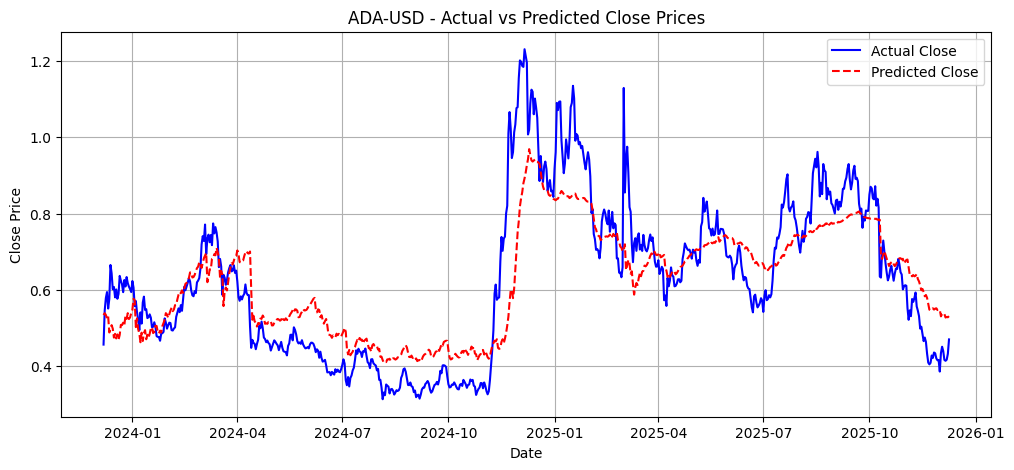

In [2]:
# ------------------------------
# Plot historical vs predicted
# ------------------------------
model.eval()
with torch.no_grad():
    X_all = torch.tensor(X_seq, dtype=torch.float32).to(DEVICE)
    preds_scaled = model(X_all).cpu().numpy()

# Inverse transform to original price scale
preds = scaler_y.inverse_transform(preds_scaled.reshape(-1,1)).flatten()
actual = df[TARGET].values[SEQ_LEN:]  # because first SEQ_LEN values are used for sequences
dates = df['Date'].values[SEQ_LEN:]

plt.figure(figsize=(12,5))
plt.plot(dates, actual, label='Actual Close', color='blue')
plt.plot(dates, preds, label='Predicted Close', linestyle='--', color='red')
plt.title(f'{crypto_name} - Actual vs Predicted Close Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()


c:\Users\moham\Downloads\scrape\main\crypto_project\venv\Lib\site-packages\torch\nn\modules\transformer.py:392: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.num_heads is odd
  warnings.warn(


Epoch 10/50, Loss: 0.043276
Epoch 20/50, Loss: 0.034090
Epoch 30/50, Loss: 0.027774
Epoch 40/50, Loss: 0.023657
Epoch 50/50, Loss: 0.023390
ADA-USD next day predicted close: 0.465547


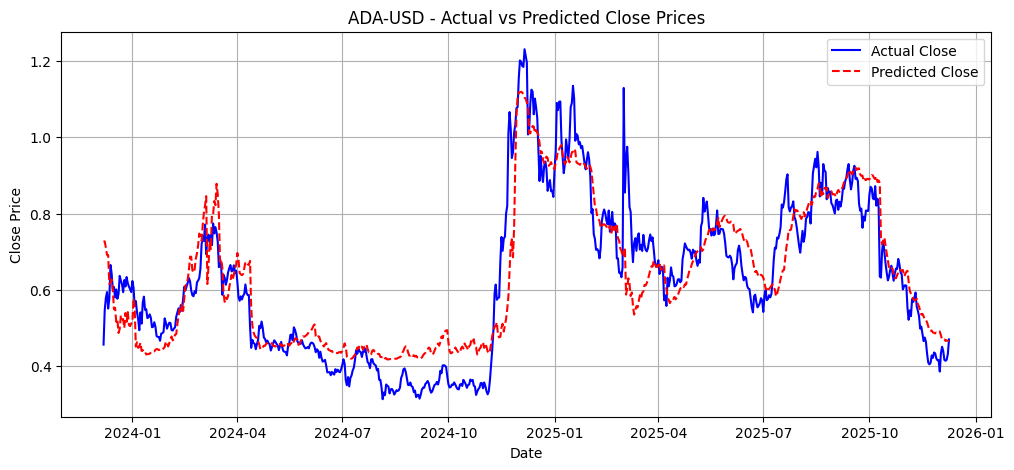

In [12]:
import os
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import ta  # pip install ta

# ------------------------------
# CONFIG
# ------------------------------
DATA_FOLDER = r"C:\Users\moham\Downloads\scrape\main\crypto_project\data\raw\ten_main_crytpo_10-12-2025"
FEATURES = ['EMA_200', 'RSI_14', 'EMA_50', 'EMA_20', 'ATR_pct']
TARGET = 'Close'
SEQ_LEN = 14
EPOCHS = 50
LR = 0.001
DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'

# ------------------------------
# Transformer Model
# ------------------------------
class TimeSeriesTransformer(nn.Module):
    def __init__(self, feature_size, seq_len=SEQ_LEN, num_layers=2, nhead=1, dropout=0.1):
        super().__init__()
        self.pos_encoder = nn.Parameter(torch.zeros(seq_len, feature_size))
        encoder_layer = nn.TransformerEncoderLayer(
            d_model=feature_size, nhead=nhead, dropout=dropout, batch_first=True
        )
        self.transformer_encoder = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)
        self.decoder = nn.Linear(feature_size, 1)

    def forward(self, x):
        x = x + self.pos_encoder
        x = self.transformer_encoder(x)
        return self.decoder(x[:, -1, :])

# ------------------------------
# Functions
# ------------------------------
def calculate_indicators(df):
    for col in ['Open','High','Low','Close','Volume']:
        df[col] = pd.to_numeric(df[col], errors='coerce')

    df['EMA_200'] = ta.trend.EMAIndicator(df['Close'], 200, fillna=True).ema_indicator()
    df['EMA_50'] = ta.trend.EMAIndicator(df['Close'], 50, fillna=True).ema_indicator()
    df['EMA_20'] = ta.trend.EMAIndicator(df['Close'], 20, fillna=True).ema_indicator()
    df['RSI_14'] = ta.momentum.RSIIndicator(df['Close'], 14, fillna=True).rsi()
    df['ATR'] = ta.volatility.AverageTrueRange(df['High'], df['Low'], df['Close'], 14, fillna=True).average_true_range()
    df['ATR_pct'] = df['ATR'] / df['Close'] * 100
    return df

def create_sequences(data, seq_len=SEQ_LEN):
    xs, ys = [], []
    for i in range(len(data) - seq_len):
        xs.append(data[i:i+seq_len])
        ys.append(data[i+seq_len, 0])
    return np.array(xs), np.array(ys)

# ------------------------------
# Load one crypto file
# ------------------------------
crypto_files = [f for f in os.listdir(DATA_FOLDER) if f.endswith("_daily_history.csv")]
file = crypto_files[0]  # first file only
crypto_name = file.replace("_daily_history.csv","")

df = pd.read_csv(os.path.join(DATA_FOLDER, file), parse_dates=['Date'])
df = df.sort_values('Date')

# Calculate indicators
df = calculate_indicators(df)
df = df.dropna(subset=FEATURES + [TARGET])

# Scale
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()
X_scaled = scaler_x.fit_transform(df[FEATURES])
y_scaled = scaler_y.fit_transform(df[[TARGET]])

data_combined = np.hstack([y_scaled, X_scaled])
X_seq, y_seq = create_sequences(data_combined, SEQ_LEN)
X_seq = X_seq[:, :, 1:]  # only features

# Convert to tensors
X_train = torch.tensor(X_seq, dtype=torch.float32).to(DEVICE)
y_train = torch.tensor(y_seq, dtype=torch.float32).unsqueeze(-1).to(DEVICE)

# ------------------------------
# Train model
# ------------------------------
model = TimeSeriesTransformer(feature_size=len(FEATURES)).to(DEVICE)
criterion = nn.MSELoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=LR)

for epoch in range(EPOCHS):
    model.train()
    optimizer.zero_grad()
    output = model(X_train)
    loss = criterion(output, y_train)
    loss.backward()
    optimizer.step()
    if (epoch+1) % 10 == 0:
        print(f"Epoch {epoch+1}/{EPOCHS}, Loss: {loss.item():.6f}")

# ------------------------------
# Predict next day
# ------------------------------
model.eval()
last_seq = X_seq[-1:]  # last SEQ_LEN rows
last_seq_tensor = torch.tensor(last_seq, dtype=torch.float32).to(DEVICE)

with torch.no_grad():
    pred_scaled = model(last_seq_tensor).cpu().numpy()

# Convert scaled prediction to scalar
pred_scaled_scalar = float(pred_scaled[0,0])

# Inverse transform to actual Close price
last_row = data_combined[-1].reshape(1,-1).copy()
last_row[0,0] = pred_scaled_scalar
pred_next = scaler_y.inverse_transform(last_row[:,0].reshape(-1,1))[0,0]

print(f"{crypto_name} next day predicted close: {pred_next:.6f}")

# ------------------------------
# Plot historical vs predicted
# ------------------------------
with torch.no_grad():
    X_all = torch.tensor(X_seq, dtype=torch.float32).to(DEVICE)
    preds_scaled = model(X_all).cpu().numpy()

preds = scaler_y.inverse_transform(preds_scaled.reshape(-1,1)).flatten()
actual = df[TARGET].values[SEQ_LEN:]
dates = df['Date'].values[SEQ_LEN:]

plt.figure(figsize=(12,5))
plt.plot(dates, actual, label='Actual Close', color='blue')
plt.plot(dates, preds, label='Predicted Close', linestyle='--', color='red')
plt.title(f'{crypto_name} - Actual vs Predicted Close Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()


### AVAX-USD using Transformer (Avalanche)

c:\Users\moham\Downloads\scrape\main\crypto_project\venv\Lib\site-packages\torch\nn\modules\transformer.py:392: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.num_heads is odd
  warnings.warn(


Epoch 10/50, Loss: 0.035006
Epoch 20/50, Loss: 0.022186
Epoch 30/50, Loss: 0.018220
Epoch 40/50, Loss: 0.013994
Epoch 50/50, Loss: 0.014756
AVAX-USD next day predicted close: 20.099836


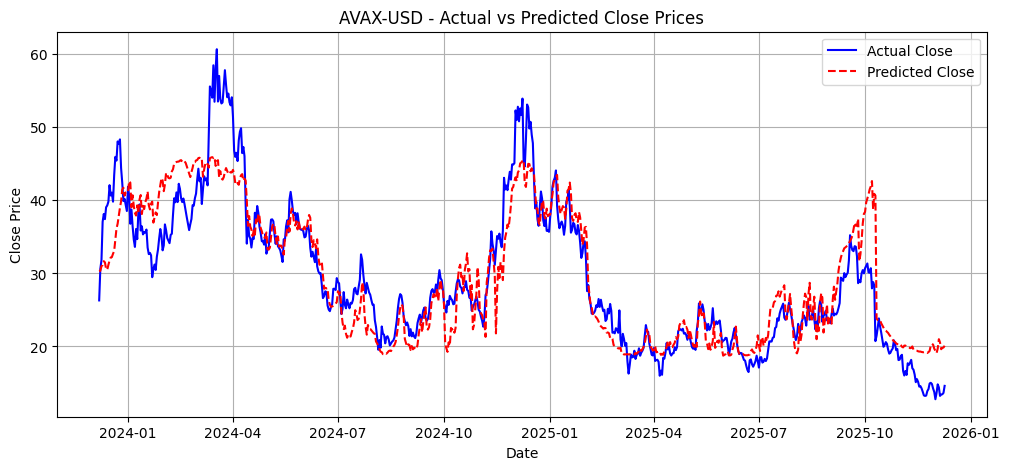

In [3]:
import os
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import ta  # pip install ta

# ------------------------------
# CONFIG
# ------------------------------
DATA_FOLDER = r"C:\Users\moham\Downloads\scrape\main\crypto_project\data\raw\ten_main_crytpo_10-12-2025"
FEATURES = ['EMA_200', 'RSI_14', 'EMA_50', 'EMA_20', 'ATR_pct']
TARGET = 'Close'
SEQ_LEN = 14
EPOCHS = 50
LR = 0.001
DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'

# ------------------------------
# Transformer Model
# ------------------------------
class TimeSeriesTransformer(nn.Module):
    def __init__(self, feature_size, seq_len=SEQ_LEN, num_layers=2, nhead=1, dropout=0.1):
        super().__init__()
        self.pos_encoder = nn.Parameter(torch.zeros(seq_len, feature_size))
        encoder_layer = nn.TransformerEncoderLayer(d_model=feature_size, nhead=nhead, dropout=dropout, batch_first=True)
        self.transformer_encoder = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)
        self.decoder = nn.Linear(feature_size, 1)

    def forward(self, x):
        x = x + self.pos_encoder
        x = self.transformer_encoder(x)
        return self.decoder(x[:, -1, :])

# ------------------------------
# Functions
# ------------------------------
def calculate_indicators(df):
    for col in ['Open','High','Low','Close','Volume']:
        df[col] = pd.to_numeric(df[col], errors='coerce')

    df['EMA_200'] = ta.trend.EMAIndicator(df['Close'], 200, fillna=True).ema_indicator()
    df['EMA_50'] = ta.trend.EMAIndicator(df['Close'], 50, fillna=True).ema_indicator()
    df['EMA_20'] = ta.trend.EMAIndicator(df['Close'], 20, fillna=True).ema_indicator()
    df['RSI_14'] = ta.momentum.RSIIndicator(df['Close'], 14, fillna=True).rsi()
    df['ATR'] = ta.volatility.AverageTrueRange(df['High'], df['Low'], df['Close'], 14, fillna=True).average_true_range()
    df['ATR_pct'] = df['ATR'] / df['Close'] * 100
    return df

def create_sequences(data, seq_len=SEQ_LEN):
    xs, ys = [], []
    for i in range(len(data) - seq_len):
        xs.append(data[i:i+seq_len])
        ys.append(data[i+seq_len, 0])
    return np.array(xs), np.array(ys)

# ------------------------------
# Select one crypto file
# ------------------------------
crypto_files = [f for f in os.listdir(DATA_FOLDER) if f.endswith("_daily_history.csv")]
file = crypto_files[1]  # only first file
crypto_name = file.replace("_daily_history.csv","")

df = pd.read_csv(os.path.join(DATA_FOLDER, file), parse_dates=['Date'])
df = df.sort_values('Date')

# Calculate indicators
df = calculate_indicators(df)
df = df.dropna(subset=FEATURES + [TARGET])

# Scale
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()
X_scaled = scaler_x.fit_transform(df[FEATURES])
y_scaled = scaler_y.fit_transform(df[[TARGET]])

data_combined = np.hstack([y_scaled, X_scaled])
X_seq, y_seq = create_sequences(data_combined, SEQ_LEN)
X_seq = X_seq[:, :, 1:]  # only features

# Convert to tensors
X_train = torch.tensor(X_seq, dtype=torch.float32).to(DEVICE)
y_train = torch.tensor(y_seq, dtype=torch.float32).unsqueeze(-1).to(DEVICE)

# ------------------------------
# Train model
# ------------------------------
model = TimeSeriesTransformer(feature_size=len(FEATURES)).to(DEVICE)
criterion = nn.MSELoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=LR)

for epoch in range(EPOCHS):
    model.train()
    optimizer.zero_grad()
    output = model(X_train)
    loss = criterion(output, y_train)
    loss.backward()
    optimizer.step()
    if (epoch+1) % 10 == 0:
        print(f"Epoch {epoch+1}/{EPOCHS}, Loss: {loss.item():.6f}")

# ------------------------------
# Predict next day
# ------------------------------
model.eval()
last_seq = X_seq[-1:]
with torch.no_grad():
    seq = torch.tensor(last_seq, dtype=torch.float32).to(DEVICE)
    pred_scaled = model(seq).cpu().numpy()
pred_next = scaler_y.inverse_transform(pred_scaled.reshape(-1,1))[0][0]

print(f"{crypto_name} next day predicted close: {pred_next:.6f}")

# ------------------------------
# Plot historical vs predicted
# ------------------------------
model.eval()
with torch.no_grad():
    X_all = torch.tensor(X_seq, dtype=torch.float32).to(DEVICE)
    preds_scaled = model(X_all).cpu().numpy()

# Inverse transform to original price scale
preds = scaler_y.inverse_transform(preds_scaled.reshape(-1,1)).flatten()
actual = df[TARGET].values[SEQ_LEN:]  # because first SEQ_LEN values are used for sequences
dates = df['Date'].values[SEQ_LEN:]

plt.figure(figsize=(12,5))
plt.plot(dates, actual, label='Actual Close', color='blue')
plt.plot(dates, preds, label='Predicted Close', linestyle='--', color='red')
plt.title(f'{crypto_name} - Actual vs Predicted Close Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()

c:\Users\moham\Downloads\scrape\main\crypto_project\venv\Lib\site-packages\torch\nn\modules\transformer.py:392: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.num_heads is odd
  warnings.warn(


Epoch 10/50, Loss: 0.031379
Epoch 20/50, Loss: 0.028164
Epoch 30/50, Loss: 0.022883
Epoch 40/50, Loss: 0.017767
Epoch 50/50, Loss: 0.016925
AVAX-USD next day predicted close: 21.364904


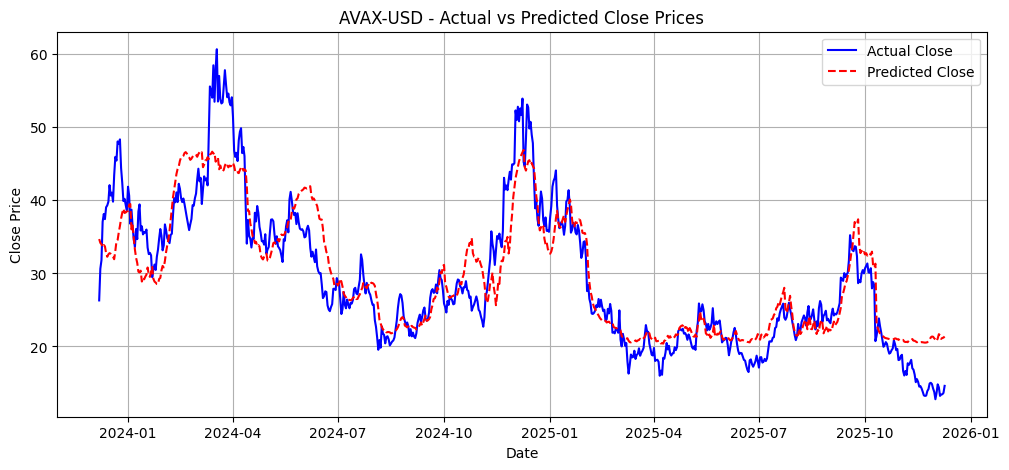

In [14]:
import os
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import ta  # pip install ta

# ------------------------------
# CONFIG
# ------------------------------
DATA_FOLDER = r"C:\Users\moham\Downloads\scrape\main\crypto_project\data\raw\ten_main_crytpo_10-12-2025"
FEATURES = ['EMA_200', 'RSI_14', 'EMA_50', 'EMA_20', 'ATR_pct']
TARGET = 'Close'
SEQ_LEN = 14
EPOCHS = 50
LR = 0.001
DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'

# ------------------------------
# Transformer Model
# ------------------------------
class TimeSeriesTransformer(nn.Module):
    def __init__(self, feature_size, seq_len=SEQ_LEN, num_layers=2, nhead=1, dropout=0.1):
        super().__init__()
        self.pos_encoder = nn.Parameter(torch.zeros(seq_len, feature_size))
        encoder_layer = nn.TransformerEncoderLayer(
            d_model=feature_size, nhead=nhead, dropout=dropout, batch_first=True
        )
        self.transformer_encoder = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)
        self.decoder = nn.Linear(feature_size, 1)

    def forward(self, x):
        x = x + self.pos_encoder
        x = self.transformer_encoder(x)
        return self.decoder(x[:, -1, :])

# ------------------------------
# Functions
# ------------------------------
def calculate_indicators(df):
    for col in ['Open','High','Low','Close','Volume']:
        df[col] = pd.to_numeric(df[col], errors='coerce')

    df['EMA_200'] = ta.trend.EMAIndicator(df['Close'], 200, fillna=True).ema_indicator()
    df['EMA_50'] = ta.trend.EMAIndicator(df['Close'], 50, fillna=True).ema_indicator()
    df['EMA_20'] = ta.trend.EMAIndicator(df['Close'], 20, fillna=True).ema_indicator()
    df['RSI_14'] = ta.momentum.RSIIndicator(df['Close'], 14, fillna=True).rsi()
    df['ATR'] = ta.volatility.AverageTrueRange(df['High'], df['Low'], df['Close'], 14, fillna=True).average_true_range()
    df['ATR_pct'] = df['ATR'] / df['Close'] * 100
    return df

def create_sequences(data, seq_len=SEQ_LEN):
    xs, ys = [], []
    for i in range(len(data) - seq_len):
        xs.append(data[i:i+seq_len])
        ys.append(data[i+seq_len, 0])
    return np.array(xs), np.array(ys)

# ------------------------------
# Load one crypto file
# ------------------------------
crypto_files = [f for f in os.listdir(DATA_FOLDER) if f.endswith("_daily_history.csv")]
file = crypto_files[1]  # first file only
crypto_name = file.replace("_daily_history.csv","")

df = pd.read_csv(os.path.join(DATA_FOLDER, file), parse_dates=['Date'])
df = df.sort_values('Date')

# Calculate indicators
df = calculate_indicators(df)
df = df.dropna(subset=FEATURES + [TARGET])

# Scale
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()
X_scaled = scaler_x.fit_transform(df[FEATURES])
y_scaled = scaler_y.fit_transform(df[[TARGET]])

data_combined = np.hstack([y_scaled, X_scaled])
X_seq, y_seq = create_sequences(data_combined, SEQ_LEN)
X_seq = X_seq[:, :, 1:]  # only features

# Convert to tensors
X_train = torch.tensor(X_seq, dtype=torch.float32).to(DEVICE)
y_train = torch.tensor(y_seq, dtype=torch.float32).unsqueeze(-1).to(DEVICE)

# ------------------------------
# Train model
# ------------------------------
model = TimeSeriesTransformer(feature_size=len(FEATURES)).to(DEVICE)
criterion = nn.MSELoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=LR)

for epoch in range(EPOCHS):
    model.train()
    optimizer.zero_grad()
    output = model(X_train)
    loss = criterion(output, y_train)
    loss.backward()
    optimizer.step()
    if (epoch+1) % 10 == 0:
        print(f"Epoch {epoch+1}/{EPOCHS}, Loss: {loss.item():.6f}")

# ------------------------------
# Predict next day correctly
# ------------------------------
model.eval()
last_seq_tensor = torch.tensor(X_seq[-1:], dtype=torch.float32).to(DEVICE)

with torch.no_grad():
    pred_scaled = model(last_seq_tensor).cpu().numpy()  # shape (1,1)

# Inverse transform correctly
pred_next = scaler_y.inverse_transform(pred_scaled.reshape(-1,1))[0,0]

print(f"{crypto_name} next day predicted close: {pred_next:.6f}")


# ------------------------------
# Plot historical vs predicted
# ------------------------------
with torch.no_grad():
    X_all = torch.tensor(X_seq, dtype=torch.float32).to(DEVICE)
    preds_scaled = model(X_all).cpu().numpy()

preds = scaler_y.inverse_transform(preds_scaled.reshape(-1,1)).flatten()
actual = df[TARGET].values[SEQ_LEN:]
dates = df['Date'].values[SEQ_LEN:]

plt.figure(figsize=(12,5))
plt.plot(dates, actual, label='Actual Close', color='blue')
plt.plot(dates, preds, label='Predicted Close', linestyle='--', color='red')
plt.title(f'{crypto_name} - Actual vs Predicted Close Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()


### BNB-USD using Transformer (Binance)

c:\Users\moham\Downloads\scrape\main\crypto_project\venv\Lib\site-packages\torch\nn\modules\transformer.py:392: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.num_heads is odd
  warnings.warn(


Epoch 10/50, Loss: 0.033321
Epoch 20/50, Loss: 0.032783
Epoch 30/50, Loss: 0.029213
Epoch 40/50, Loss: 0.028079
Epoch 50/50, Loss: 0.025648
BNB-USD next day predicted close: 742.922302


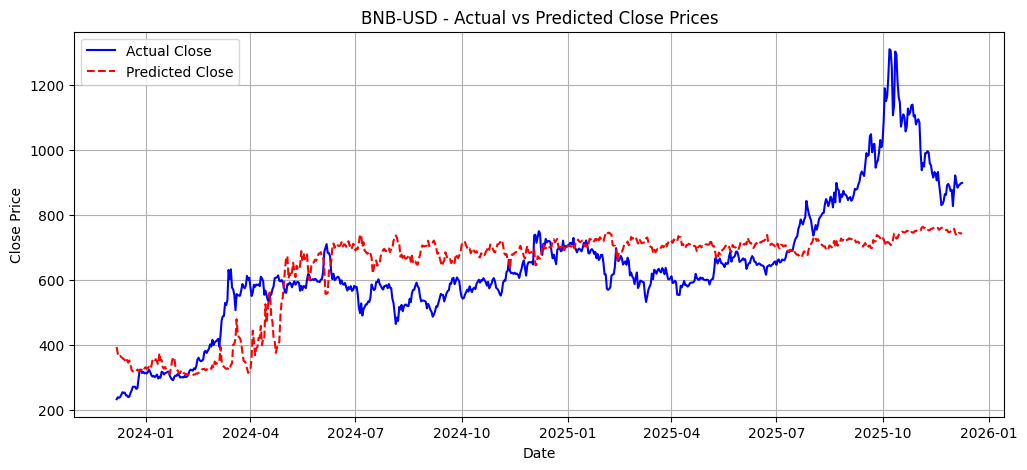

In [4]:
import os
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import ta  # pip install ta

# ------------------------------
# CONFIG
# ------------------------------
DATA_FOLDER = r"C:\Users\moham\Downloads\scrape\main\crypto_project\data\raw\ten_main_crytpo_10-12-2025"
FEATURES = ['EMA_200', 'RSI_14', 'EMA_50', 'EMA_20', 'ATR_pct']
TARGET = 'Close'
SEQ_LEN = 14
EPOCHS = 50
LR = 0.001
DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'

# ------------------------------
# Transformer Model
# ------------------------------
class TimeSeriesTransformer(nn.Module):
    def __init__(self, feature_size, seq_len=SEQ_LEN, num_layers=2, nhead=1, dropout=0.1):
        super().__init__()
        self.pos_encoder = nn.Parameter(torch.zeros(seq_len, feature_size))
        encoder_layer = nn.TransformerEncoderLayer(d_model=feature_size, nhead=nhead, dropout=dropout, batch_first=True)
        self.transformer_encoder = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)
        self.decoder = nn.Linear(feature_size, 1)

    def forward(self, x):
        x = x + self.pos_encoder
        x = self.transformer_encoder(x)
        return self.decoder(x[:, -1, :])

# ------------------------------
# Functions
# ------------------------------
def calculate_indicators(df):
    for col in ['Open','High','Low','Close','Volume']:
        df[col] = pd.to_numeric(df[col], errors='coerce')

    df['EMA_200'] = ta.trend.EMAIndicator(df['Close'], 200, fillna=True).ema_indicator()
    df['EMA_50'] = ta.trend.EMAIndicator(df['Close'], 50, fillna=True).ema_indicator()
    df['EMA_20'] = ta.trend.EMAIndicator(df['Close'], 20, fillna=True).ema_indicator()
    df['RSI_14'] = ta.momentum.RSIIndicator(df['Close'], 14, fillna=True).rsi()
    df['ATR'] = ta.volatility.AverageTrueRange(df['High'], df['Low'], df['Close'], 14, fillna=True).average_true_range()
    df['ATR_pct'] = df['ATR'] / df['Close'] * 100
    return df

def create_sequences(data, seq_len=SEQ_LEN):
    xs, ys = [], []
    for i in range(len(data) - seq_len):
        xs.append(data[i:i+seq_len])
        ys.append(data[i+seq_len, 0])
    return np.array(xs), np.array(ys)

# ------------------------------
# Select one crypto file
# ------------------------------
crypto_files = [f for f in os.listdir(DATA_FOLDER) if f.endswith("_daily_history.csv")]
file = crypto_files[2]  # only first file
crypto_name = file.replace("_daily_history.csv","")

df = pd.read_csv(os.path.join(DATA_FOLDER, file), parse_dates=['Date'])
df = df.sort_values('Date')

# Calculate indicators
df = calculate_indicators(df)
df = df.dropna(subset=FEATURES + [TARGET])

# Scale
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()
X_scaled = scaler_x.fit_transform(df[FEATURES])
y_scaled = scaler_y.fit_transform(df[[TARGET]])

data_combined = np.hstack([y_scaled, X_scaled])
X_seq, y_seq = create_sequences(data_combined, SEQ_LEN)
X_seq = X_seq[:, :, 1:]  # only features

# Convert to tensors
X_train = torch.tensor(X_seq, dtype=torch.float32).to(DEVICE)
y_train = torch.tensor(y_seq, dtype=torch.float32).unsqueeze(-1).to(DEVICE)

# ------------------------------
# Train model
# ------------------------------
model = TimeSeriesTransformer(feature_size=len(FEATURES)).to(DEVICE)
criterion = nn.MSELoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=LR)

for epoch in range(EPOCHS):
    model.train()
    optimizer.zero_grad()
    output = model(X_train)
    loss = criterion(output, y_train)
    loss.backward()
    optimizer.step()
    if (epoch+1) % 10 == 0:
        print(f"Epoch {epoch+1}/{EPOCHS}, Loss: {loss.item():.6f}")

# ------------------------------
# Predict next day
# ------------------------------
model.eval()
last_seq = X_seq[-1:]
with torch.no_grad():
    seq = torch.tensor(last_seq, dtype=torch.float32).to(DEVICE)
    pred_scaled = model(seq).cpu().numpy()
pred_next = scaler_y.inverse_transform(pred_scaled.reshape(-1,1))[0][0]

print(f"{crypto_name} next day predicted close: {pred_next:.6f}")

# ------------------------------
# Plot historical vs predicted
# ------------------------------
model.eval()
with torch.no_grad():
    X_all = torch.tensor(X_seq, dtype=torch.float32).to(DEVICE)
    preds_scaled = model(X_all).cpu().numpy()

# Inverse transform to original price scale
preds = scaler_y.inverse_transform(preds_scaled.reshape(-1,1)).flatten()
actual = df[TARGET].values[SEQ_LEN:]  # because first SEQ_LEN values are used for sequences
dates = df['Date'].values[SEQ_LEN:]

plt.figure(figsize=(12,5))
plt.plot(dates, actual, label='Actual Close', color='blue')
plt.plot(dates, preds, label='Predicted Close', linestyle='--', color='red')
plt.title(f'{crypto_name} - Actual vs Predicted Close Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()

### BTC-USD (Bitcoin)

C:\Users\moham\AppData\Local\Temp\ipykernel_27740\207231313.py:66: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df = pd.read_csv(os.path.join(DATA_FOLDER, file), parse_dates=['Date'])
c:\Users\moham\Downloads\scrape\main\crypto_project\venv\Lib\site-packages\torch\nn\modules\transformer.py:392: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.num_heads is odd
  warnings.warn(


Epoch 10/50, Loss: 0.019755
Epoch 20/50, Loss: 0.017305
Epoch 30/50, Loss: 0.013968
Epoch 40/50, Loss: 0.012554
Epoch 50/50, Loss: 0.011750
BTC-USD next day predicted close: 107794.554688


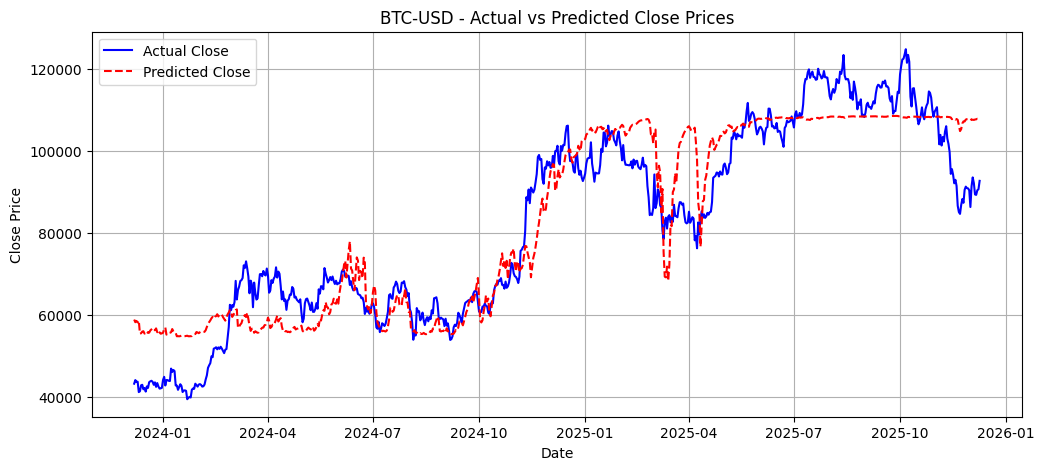

In [5]:
import os
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import ta  # pip install ta

# ------------------------------
# CONFIG
# ------------------------------
DATA_FOLDER = r"C:\Users\moham\Downloads\scrape\main\crypto_project\data\raw\ten_main_crytpo_10-12-2025"
FEATURES = ['EMA_200', 'RSI_14', 'EMA_50', 'EMA_20', 'ATR_pct']
TARGET = 'Close'
SEQ_LEN = 14
EPOCHS = 50
LR = 0.001
DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'

# ------------------------------
# Transformer Model
# ------------------------------
class TimeSeriesTransformer(nn.Module):
    def __init__(self, feature_size, seq_len=SEQ_LEN, num_layers=2, nhead=1, dropout=0.1):
        super().__init__()
        self.pos_encoder = nn.Parameter(torch.zeros(seq_len, feature_size))
        encoder_layer = nn.TransformerEncoderLayer(d_model=feature_size, nhead=nhead, dropout=dropout, batch_first=True)
        self.transformer_encoder = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)
        self.decoder = nn.Linear(feature_size, 1)

    def forward(self, x):
        x = x + self.pos_encoder
        x = self.transformer_encoder(x)
        return self.decoder(x[:, -1, :])

# ------------------------------
# Functions
# ------------------------------
def calculate_indicators(df):
    for col in ['Open','High','Low','Close','Volume']:
        df[col] = pd.to_numeric(df[col], errors='coerce')

    df['EMA_200'] = ta.trend.EMAIndicator(df['Close'], 200, fillna=True).ema_indicator()
    df['EMA_50'] = ta.trend.EMAIndicator(df['Close'], 50, fillna=True).ema_indicator()
    df['EMA_20'] = ta.trend.EMAIndicator(df['Close'], 20, fillna=True).ema_indicator()
    df['RSI_14'] = ta.momentum.RSIIndicator(df['Close'], 14, fillna=True).rsi()
    df['ATR'] = ta.volatility.AverageTrueRange(df['High'], df['Low'], df['Close'], 14, fillna=True).average_true_range()
    df['ATR_pct'] = df['ATR'] / df['Close'] * 100
    return df

def create_sequences(data, seq_len=SEQ_LEN):
    xs, ys = [], []
    for i in range(len(data) - seq_len):
        xs.append(data[i:i+seq_len])
        ys.append(data[i+seq_len, 0])
    return np.array(xs), np.array(ys)

# ------------------------------
# Select one crypto file
# ------------------------------
crypto_files = [f for f in os.listdir(DATA_FOLDER) if f.endswith("_daily_history.csv")]
file = crypto_files[3]  # only first file
crypto_name = file.replace("_daily_history.csv","")

df = pd.read_csv(os.path.join(DATA_FOLDER, file), parse_dates=['Date'])
df = df.sort_values('Date')

# Calculate indicators
df = calculate_indicators(df)
df = df.dropna(subset=FEATURES + [TARGET])

# Scale
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()
X_scaled = scaler_x.fit_transform(df[FEATURES])
y_scaled = scaler_y.fit_transform(df[[TARGET]])

data_combined = np.hstack([y_scaled, X_scaled])
X_seq, y_seq = create_sequences(data_combined, SEQ_LEN)
X_seq = X_seq[:, :, 1:]  # only features

# Convert to tensors
X_train = torch.tensor(X_seq, dtype=torch.float32).to(DEVICE)
y_train = torch.tensor(y_seq, dtype=torch.float32).unsqueeze(-1).to(DEVICE)

# ------------------------------
# Train model
# ------------------------------
model = TimeSeriesTransformer(feature_size=len(FEATURES)).to(DEVICE)
criterion = nn.MSELoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=LR)

for epoch in range(EPOCHS):
    model.train()
    optimizer.zero_grad()
    output = model(X_train)
    loss = criterion(output, y_train)
    loss.backward()
    optimizer.step()
    if (epoch+1) % 10 == 0:
        print(f"Epoch {epoch+1}/{EPOCHS}, Loss: {loss.item():.6f}")

# ------------------------------
# Predict next day
# ------------------------------
model.eval()
last_seq = X_seq[-1:]
with torch.no_grad():
    seq = torch.tensor(last_seq, dtype=torch.float32).to(DEVICE)
    pred_scaled = model(seq).cpu().numpy()
pred_next = scaler_y.inverse_transform(pred_scaled.reshape(-1,1))[0][0]

print(f"{crypto_name} next day predicted close: {pred_next:.6f}")

# ------------------------------
# Plot historical vs predicted
# ------------------------------
model.eval()
with torch.no_grad():
    X_all = torch.tensor(X_seq, dtype=torch.float32).to(DEVICE)
    preds_scaled = model(X_all).cpu().numpy()

# Inverse transform to original price scale
preds = scaler_y.inverse_transform(preds_scaled.reshape(-1,1)).flatten()
actual = df[TARGET].values[SEQ_LEN:]  # because first SEQ_LEN values are used for sequences
dates = df['Date'].values[SEQ_LEN:]

plt.figure(figsize=(12,5))
plt.plot(dates, actual, label='Actual Close', color='blue')
plt.plot(dates, preds, label='Predicted Close', linestyle='--', color='red')
plt.title(f'{crypto_name} - Actual vs Predicted Close Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()

### dot-usd POLKADOT

c:\Users\moham\Downloads\scrape\main\crypto_project\venv\Lib\site-packages\torch\nn\modules\transformer.py:392: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.num_heads is odd
  warnings.warn(


Epoch 10/50, Loss: 0.025251
Epoch 20/50, Loss: 0.018031
Epoch 30/50, Loss: 0.015010
Epoch 40/50, Loss: 0.012714
Epoch 50/50, Loss: 0.011185
DOT-USD next day predicted close: 3.341000


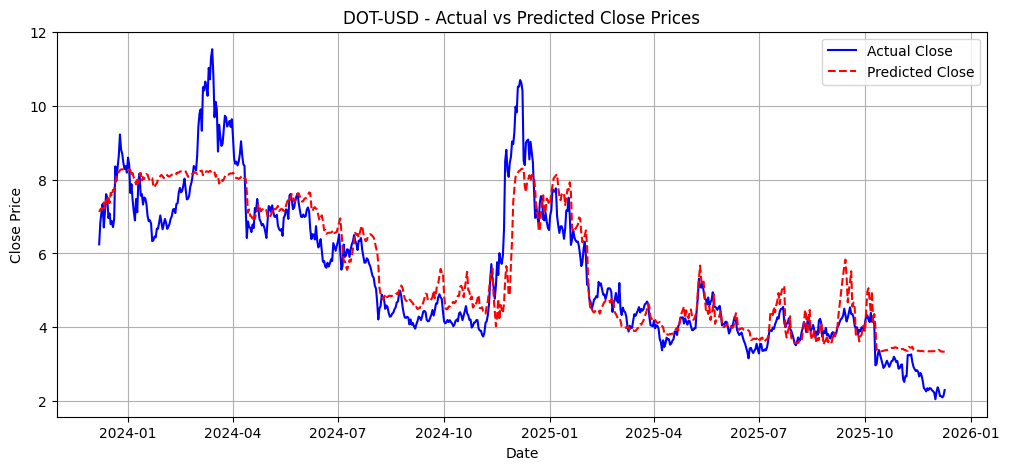

In [6]:
import os
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import ta  # pip install ta

# ------------------------------
# CONFIG
# ------------------------------
DATA_FOLDER = r"C:\Users\moham\Downloads\scrape\main\crypto_project\data\raw\ten_main_crytpo_10-12-2025"
FEATURES = ['EMA_200', 'RSI_14', 'EMA_50', 'EMA_20', 'ATR_pct']
TARGET = 'Close'
SEQ_LEN = 14
EPOCHS = 50
LR = 0.001
DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'

# ------------------------------
# Transformer Model
# ------------------------------
class TimeSeriesTransformer(nn.Module):
    def __init__(self, feature_size, seq_len=SEQ_LEN, num_layers=2, nhead=1, dropout=0.1):
        super().__init__()
        self.pos_encoder = nn.Parameter(torch.zeros(seq_len, feature_size))
        encoder_layer = nn.TransformerEncoderLayer(d_model=feature_size, nhead=nhead, dropout=dropout, batch_first=True)
        self.transformer_encoder = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)
        self.decoder = nn.Linear(feature_size, 1)

    def forward(self, x):
        x = x + self.pos_encoder
        x = self.transformer_encoder(x)
        return self.decoder(x[:, -1, :])

# ------------------------------
# Functions
# ------------------------------
def calculate_indicators(df):
    for col in ['Open','High','Low','Close','Volume']:
        df[col] = pd.to_numeric(df[col], errors='coerce')

    df['EMA_200'] = ta.trend.EMAIndicator(df['Close'], 200, fillna=True).ema_indicator()
    df['EMA_50'] = ta.trend.EMAIndicator(df['Close'], 50, fillna=True).ema_indicator()
    df['EMA_20'] = ta.trend.EMAIndicator(df['Close'], 20, fillna=True).ema_indicator()
    df['RSI_14'] = ta.momentum.RSIIndicator(df['Close'], 14, fillna=True).rsi()
    df['ATR'] = ta.volatility.AverageTrueRange(df['High'], df['Low'], df['Close'], 14, fillna=True).average_true_range()
    df['ATR_pct'] = df['ATR'] / df['Close'] * 100
    return df

def create_sequences(data, seq_len=SEQ_LEN):
    xs, ys = [], []
    for i in range(len(data) - seq_len):
        xs.append(data[i:i+seq_len])
        ys.append(data[i+seq_len, 0])
    return np.array(xs), np.array(ys)

# ------------------------------
# Select one crypto file
# ------------------------------
crypto_files = [f for f in os.listdir(DATA_FOLDER) if f.endswith("_daily_history.csv")]
file = crypto_files[4]  # only first file
crypto_name = file.replace("_daily_history.csv","")

df = pd.read_csv(os.path.join(DATA_FOLDER, file), parse_dates=['Date'])
df = df.sort_values('Date')

# Calculate indicators
df = calculate_indicators(df)
df = df.dropna(subset=FEATURES + [TARGET])

# Scale
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()
X_scaled = scaler_x.fit_transform(df[FEATURES])
y_scaled = scaler_y.fit_transform(df[[TARGET]])

data_combined = np.hstack([y_scaled, X_scaled])
X_seq, y_seq = create_sequences(data_combined, SEQ_LEN)
X_seq = X_seq[:, :, 1:]  # only features

# Convert to tensors
X_train = torch.tensor(X_seq, dtype=torch.float32).to(DEVICE)
y_train = torch.tensor(y_seq, dtype=torch.float32).unsqueeze(-1).to(DEVICE)

# ------------------------------
# Train model
# ------------------------------
model = TimeSeriesTransformer(feature_size=len(FEATURES)).to(DEVICE)
criterion = nn.MSELoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=LR)

for epoch in range(EPOCHS):
    model.train()
    optimizer.zero_grad()
    output = model(X_train)
    loss = criterion(output, y_train)
    loss.backward()
    optimizer.step()
    if (epoch+1) % 10 == 0:
        print(f"Epoch {epoch+1}/{EPOCHS}, Loss: {loss.item():.6f}")

# ------------------------------
# Predict next day
# ------------------------------
model.eval()
last_seq = X_seq[-1:]
with torch.no_grad():
    seq = torch.tensor(last_seq, dtype=torch.float32).to(DEVICE)
    pred_scaled = model(seq).cpu().numpy()
pred_next = scaler_y.inverse_transform(pred_scaled.reshape(-1,1))[0][0]

print(f"{crypto_name} next day predicted close: {pred_next:.6f}")

# ------------------------------
# Plot historical vs predicted
# ------------------------------
model.eval()
with torch.no_grad():
    X_all = torch.tensor(X_seq, dtype=torch.float32).to(DEVICE)
    preds_scaled = model(X_all).cpu().numpy()

# Inverse transform to original price scale
preds = scaler_y.inverse_transform(preds_scaled.reshape(-1,1)).flatten()
actual = df[TARGET].values[SEQ_LEN:]  # because first SEQ_LEN values are used for sequences
dates = df['Date'].values[SEQ_LEN:]

plt.figure(figsize=(12,5))
plt.plot(dates, actual, label='Actual Close', color='blue')
plt.plot(dates, preds, label='Predicted Close', linestyle='--', color='red')
plt.title(f'{crypto_name} - Actual vs Predicted Close Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()

### ETH - USD (Ethereum)

c:\Users\moham\Downloads\scrape\main\crypto_project\venv\Lib\site-packages\torch\nn\modules\transformer.py:392: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.num_heads is odd
  warnings.warn(


Epoch 10/50, Loss: 0.052217
Epoch 20/50, Loss: 0.029315
Epoch 30/50, Loss: 0.019258
Epoch 40/50, Loss: 0.017569
Epoch 50/50, Loss: 0.015255
ETH-USD next day predicted close: 2953.439453


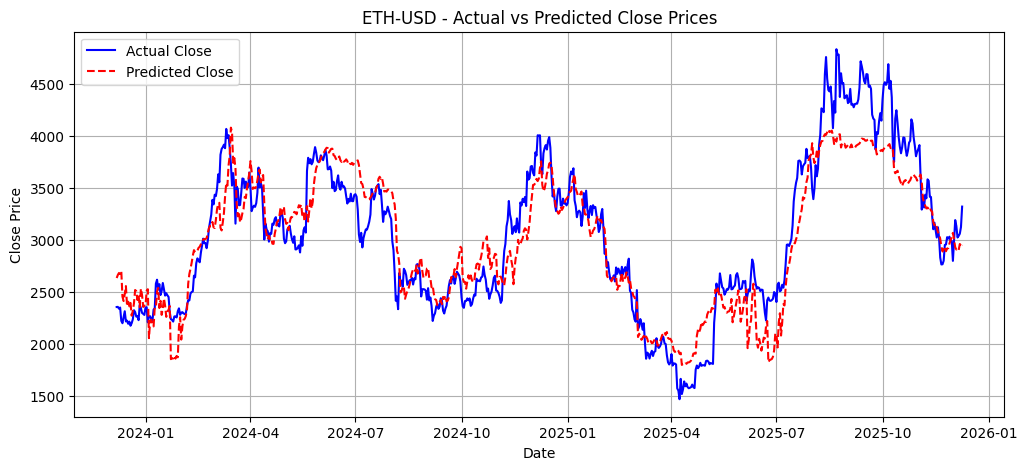

In [7]:
import os
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import ta  # pip install ta

# ------------------------------
# CONFIG
# ------------------------------
DATA_FOLDER = r"C:\Users\moham\Downloads\scrape\main\crypto_project\data\raw\ten_main_crytpo_10-12-2025"
FEATURES = ['EMA_200', 'RSI_14', 'EMA_50', 'EMA_20', 'ATR_pct']
TARGET = 'Close'
SEQ_LEN = 14
EPOCHS = 50
LR = 0.001
DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'

# ------------------------------
# Transformer Model
# ------------------------------
class TimeSeriesTransformer(nn.Module):
    def __init__(self, feature_size, seq_len=SEQ_LEN, num_layers=2, nhead=1, dropout=0.1):
        super().__init__()
        self.pos_encoder = nn.Parameter(torch.zeros(seq_len, feature_size))
        encoder_layer = nn.TransformerEncoderLayer(d_model=feature_size, nhead=nhead, dropout=dropout, batch_first=True)
        self.transformer_encoder = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)
        self.decoder = nn.Linear(feature_size, 1)

    def forward(self, x):
        x = x + self.pos_encoder
        x = self.transformer_encoder(x)
        return self.decoder(x[:, -1, :])

# ------------------------------
# Functions
# ------------------------------
def calculate_indicators(df):
    for col in ['Open','High','Low','Close','Volume']:
        df[col] = pd.to_numeric(df[col], errors='coerce')

    df['EMA_200'] = ta.trend.EMAIndicator(df['Close'], 200, fillna=True).ema_indicator()
    df['EMA_50'] = ta.trend.EMAIndicator(df['Close'], 50, fillna=True).ema_indicator()
    df['EMA_20'] = ta.trend.EMAIndicator(df['Close'], 20, fillna=True).ema_indicator()
    df['RSI_14'] = ta.momentum.RSIIndicator(df['Close'], 14, fillna=True).rsi()
    df['ATR'] = ta.volatility.AverageTrueRange(df['High'], df['Low'], df['Close'], 14, fillna=True).average_true_range()
    df['ATR_pct'] = df['ATR'] / df['Close'] * 100
    return df

def create_sequences(data, seq_len=SEQ_LEN):
    xs, ys = [], []
    for i in range(len(data) - seq_len):
        xs.append(data[i:i+seq_len])
        ys.append(data[i+seq_len, 0])
    return np.array(xs), np.array(ys)

# ------------------------------
# Select one crypto file
# ------------------------------
crypto_files = [f for f in os.listdir(DATA_FOLDER) if f.endswith("_daily_history.csv")]
file = crypto_files[5]  # only first file
crypto_name = file.replace("_daily_history.csv","")

df = pd.read_csv(os.path.join(DATA_FOLDER, file), parse_dates=['Date'])
df = df.sort_values('Date')

# Calculate indicators
df = calculate_indicators(df)
df = df.dropna(subset=FEATURES + [TARGET])

# Scale
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()
X_scaled = scaler_x.fit_transform(df[FEATURES])
y_scaled = scaler_y.fit_transform(df[[TARGET]])

data_combined = np.hstack([y_scaled, X_scaled])
X_seq, y_seq = create_sequences(data_combined, SEQ_LEN)
X_seq = X_seq[:, :, 1:]  # only features

# Convert to tensors
X_train = torch.tensor(X_seq, dtype=torch.float32).to(DEVICE)
y_train = torch.tensor(y_seq, dtype=torch.float32).unsqueeze(-1).to(DEVICE)

# ------------------------------
# Train model
# ------------------------------
model = TimeSeriesTransformer(feature_size=len(FEATURES)).to(DEVICE)
criterion = nn.MSELoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=LR)

for epoch in range(EPOCHS):
    model.train()
    optimizer.zero_grad()
    output = model(X_train)
    loss = criterion(output, y_train)
    loss.backward()
    optimizer.step()
    if (epoch+1) % 10 == 0:
        print(f"Epoch {epoch+1}/{EPOCHS}, Loss: {loss.item():.6f}")

# ------------------------------
# Predict next day
# ------------------------------
model.eval()
last_seq = X_seq[-1:]
with torch.no_grad():
    seq = torch.tensor(last_seq, dtype=torch.float32).to(DEVICE)
    pred_scaled = model(seq).cpu().numpy()
pred_next = scaler_y.inverse_transform(pred_scaled.reshape(-1,1))[0][0]

print(f"{crypto_name} next day predicted close: {pred_next:.6f}")

# ------------------------------
# Plot historical vs predicted
# ------------------------------
model.eval()
with torch.no_grad():
    X_all = torch.tensor(X_seq, dtype=torch.float32).to(DEVICE)
    preds_scaled = model(X_all).cpu().numpy()

# Inverse transform to original price scale
preds = scaler_y.inverse_transform(preds_scaled.reshape(-1,1)).flatten()
actual = df[TARGET].values[SEQ_LEN:]  # because first SEQ_LEN values are used for sequences
dates = df['Date'].values[SEQ_LEN:]

plt.figure(figsize=(12,5))
plt.plot(dates, actual, label='Actual Close', color='blue')
plt.plot(dates, preds, label='Predicted Close', linestyle='--', color='red')
plt.title(f'{crypto_name} - Actual vs Predicted Close Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()

### MATIC - USD polygon

c:\Users\moham\Downloads\scrape\main\crypto_project\venv\Lib\site-packages\torch\nn\modules\transformer.py:392: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.num_heads is odd
  warnings.warn(


Epoch 10/50, Loss: 0.046779
Epoch 20/50, Loss: 0.026247
Epoch 30/50, Loss: 0.023177
Epoch 40/50, Loss: 0.021602
Epoch 50/50, Loss: 0.022941
MATIC-USD next day predicted close: 0.409178


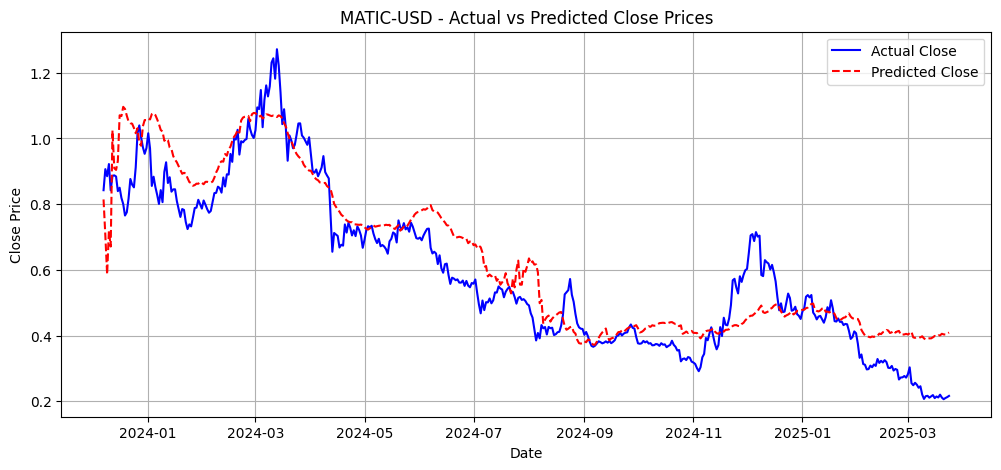

In [8]:
import os
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import ta  # pip install ta

# ------------------------------
# CONFIG
# ------------------------------
DATA_FOLDER = r"C:\Users\moham\Downloads\scrape\main\crypto_project\data\raw\ten_main_crytpo_10-12-2025"
FEATURES = ['EMA_200', 'RSI_14', 'EMA_50', 'EMA_20', 'ATR_pct']
TARGET = 'Close'
SEQ_LEN = 14
EPOCHS = 50
LR = 0.001
DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'

# ------------------------------
# Transformer Model
# ------------------------------
class TimeSeriesTransformer(nn.Module):
    def __init__(self, feature_size, seq_len=SEQ_LEN, num_layers=2, nhead=1, dropout=0.1):
        super().__init__()
        self.pos_encoder = nn.Parameter(torch.zeros(seq_len, feature_size))
        encoder_layer = nn.TransformerEncoderLayer(d_model=feature_size, nhead=nhead, dropout=dropout, batch_first=True)
        self.transformer_encoder = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)
        self.decoder = nn.Linear(feature_size, 1)

    def forward(self, x):
        x = x + self.pos_encoder
        x = self.transformer_encoder(x)
        return self.decoder(x[:, -1, :])

# ------------------------------
# Functions
# ------------------------------
def calculate_indicators(df):
    for col in ['Open','High','Low','Close','Volume']:
        df[col] = pd.to_numeric(df[col], errors='coerce')

    df['EMA_200'] = ta.trend.EMAIndicator(df['Close'], 200, fillna=True).ema_indicator()
    df['EMA_50'] = ta.trend.EMAIndicator(df['Close'], 50, fillna=True).ema_indicator()
    df['EMA_20'] = ta.trend.EMAIndicator(df['Close'], 20, fillna=True).ema_indicator()
    df['RSI_14'] = ta.momentum.RSIIndicator(df['Close'], 14, fillna=True).rsi()
    df['ATR'] = ta.volatility.AverageTrueRange(df['High'], df['Low'], df['Close'], 14, fillna=True).average_true_range()
    df['ATR_pct'] = df['ATR'] / df['Close'] * 100
    return df

def create_sequences(data, seq_len=SEQ_LEN):
    xs, ys = [], []
    for i in range(len(data) - seq_len):
        xs.append(data[i:i+seq_len])
        ys.append(data[i+seq_len, 0])
    return np.array(xs), np.array(ys)

# ------------------------------
# Select one crypto file
# ------------------------------
crypto_files = [f for f in os.listdir(DATA_FOLDER) if f.endswith("_daily_history.csv")]
file = crypto_files[6]  # only first file
crypto_name = file.replace("_daily_history.csv","")

df = pd.read_csv(os.path.join(DATA_FOLDER, file), parse_dates=['Date'])
df = df.sort_values('Date')

# Calculate indicators
df = calculate_indicators(df)
df = df.dropna(subset=FEATURES + [TARGET])

# Scale
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()
X_scaled = scaler_x.fit_transform(df[FEATURES])
y_scaled = scaler_y.fit_transform(df[[TARGET]])

data_combined = np.hstack([y_scaled, X_scaled])
X_seq, y_seq = create_sequences(data_combined, SEQ_LEN)
X_seq = X_seq[:, :, 1:]  # only features

# Convert to tensors
X_train = torch.tensor(X_seq, dtype=torch.float32).to(DEVICE)
y_train = torch.tensor(y_seq, dtype=torch.float32).unsqueeze(-1).to(DEVICE)

# ------------------------------
# Train model
# ------------------------------
model = TimeSeriesTransformer(feature_size=len(FEATURES)).to(DEVICE)
criterion = nn.MSELoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=LR)

for epoch in range(EPOCHS):
    model.train()
    optimizer.zero_grad()
    output = model(X_train)
    loss = criterion(output, y_train)
    loss.backward()
    optimizer.step()
    if (epoch+1) % 10 == 0:
        print(f"Epoch {epoch+1}/{EPOCHS}, Loss: {loss.item():.6f}")

# ------------------------------
# Predict next day
# ------------------------------
model.eval()
last_seq = X_seq[-1:]
with torch.no_grad():
    seq = torch.tensor(last_seq, dtype=torch.float32).to(DEVICE)
    pred_scaled = model(seq).cpu().numpy()
pred_next = scaler_y.inverse_transform(pred_scaled.reshape(-1,1))[0][0]

print(f"{crypto_name} next day predicted close: {pred_next:.6f}")

# ------------------------------
# Plot historical vs predicted
# ------------------------------
model.eval()
with torch.no_grad():
    X_all = torch.tensor(X_seq, dtype=torch.float32).to(DEVICE)
    preds_scaled = model(X_all).cpu().numpy()

# Inverse transform to original price scale
preds = scaler_y.inverse_transform(preds_scaled.reshape(-1,1)).flatten()
actual = df[TARGET].values[SEQ_LEN:]  # because first SEQ_LEN values are used for sequences
dates = df['Date'].values[SEQ_LEN:]

plt.figure(figsize=(12,5))
plt.plot(dates, actual, label='Actual Close', color='blue')
plt.plot(dates, preds, label='Predicted Close', linestyle='--', color='red')
plt.title(f'{crypto_name} - Actual vs Predicted Close Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()

### SOL-USD - Solana

c:\Users\moham\Downloads\scrape\main\crypto_project\venv\Lib\site-packages\torch\nn\modules\transformer.py:392: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.num_heads is odd
  warnings.warn(


Epoch 10/50, Loss: 0.031976
Epoch 20/50, Loss: 0.029660
Epoch 30/50, Loss: 0.026313
Epoch 40/50, Loss: 0.022970
Epoch 50/50, Loss: 0.019417
SOL-USD next day predicted close: 161.898407


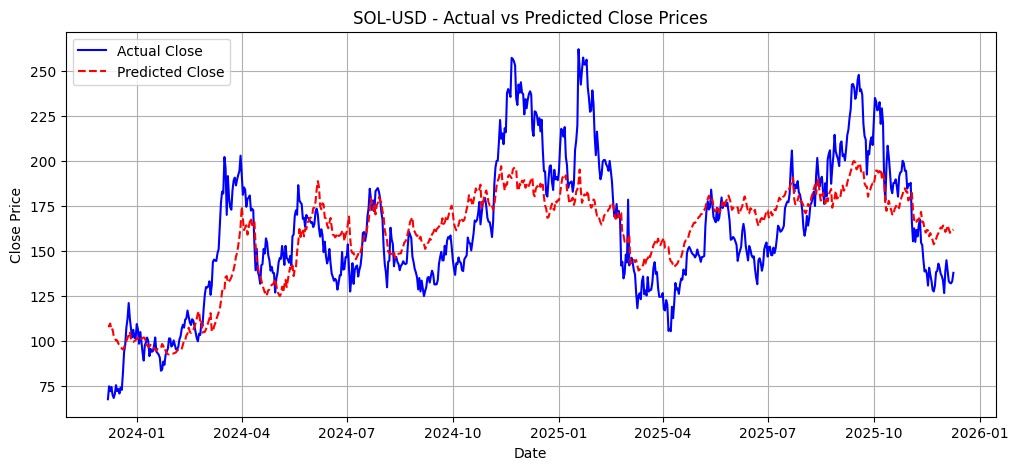

In [9]:
import os
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import ta  # pip install ta

# ------------------------------
# CONFIG
# ------------------------------
DATA_FOLDER = r"C:\Users\moham\Downloads\scrape\main\crypto_project\data\raw\ten_main_crytpo_10-12-2025"
FEATURES = ['EMA_200', 'RSI_14', 'EMA_50', 'EMA_20', 'ATR_pct']
TARGET = 'Close'
SEQ_LEN = 14
EPOCHS = 50
LR = 0.001
DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'

# ------------------------------
# Transformer Model
# ------------------------------
class TimeSeriesTransformer(nn.Module):
    def __init__(self, feature_size, seq_len=SEQ_LEN, num_layers=2, nhead=1, dropout=0.1):
        super().__init__()
        self.pos_encoder = nn.Parameter(torch.zeros(seq_len, feature_size))
        encoder_layer = nn.TransformerEncoderLayer(d_model=feature_size, nhead=nhead, dropout=dropout, batch_first=True)
        self.transformer_encoder = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)
        self.decoder = nn.Linear(feature_size, 1)

    def forward(self, x):
        x = x + self.pos_encoder
        x = self.transformer_encoder(x)
        return self.decoder(x[:, -1, :])

# ------------------------------
# Functions
# ------------------------------
def calculate_indicators(df):
    for col in ['Open','High','Low','Close','Volume']:
        df[col] = pd.to_numeric(df[col], errors='coerce')

    df['EMA_200'] = ta.trend.EMAIndicator(df['Close'], 200, fillna=True).ema_indicator()
    df['EMA_50'] = ta.trend.EMAIndicator(df['Close'], 50, fillna=True).ema_indicator()
    df['EMA_20'] = ta.trend.EMAIndicator(df['Close'], 20, fillna=True).ema_indicator()
    df['RSI_14'] = ta.momentum.RSIIndicator(df['Close'], 14, fillna=True).rsi()
    df['ATR'] = ta.volatility.AverageTrueRange(df['High'], df['Low'], df['Close'], 14, fillna=True).average_true_range()
    df['ATR_pct'] = df['ATR'] / df['Close'] * 100
    return df

def create_sequences(data, seq_len=SEQ_LEN):
    xs, ys = [], []
    for i in range(len(data) - seq_len):
        xs.append(data[i:i+seq_len])
        ys.append(data[i+seq_len, 0])
    return np.array(xs), np.array(ys)

# ------------------------------
# Select one crypto file
# ------------------------------
crypto_files = [f for f in os.listdir(DATA_FOLDER) if f.endswith("_daily_history.csv")]
file = crypto_files[7]  # only first file
crypto_name = file.replace("_daily_history.csv","")

df = pd.read_csv(os.path.join(DATA_FOLDER, file), parse_dates=['Date'])
df = df.sort_values('Date')

# Calculate indicators
df = calculate_indicators(df)
df = df.dropna(subset=FEATURES + [TARGET])

# Scale
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()
X_scaled = scaler_x.fit_transform(df[FEATURES])
y_scaled = scaler_y.fit_transform(df[[TARGET]])

data_combined = np.hstack([y_scaled, X_scaled])
X_seq, y_seq = create_sequences(data_combined, SEQ_LEN)
X_seq = X_seq[:, :, 1:]  # only features

# Convert to tensors
X_train = torch.tensor(X_seq, dtype=torch.float32).to(DEVICE)
y_train = torch.tensor(y_seq, dtype=torch.float32).unsqueeze(-1).to(DEVICE)

# ------------------------------
# Train model
# ------------------------------
model = TimeSeriesTransformer(feature_size=len(FEATURES)).to(DEVICE)
criterion = nn.MSELoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=LR)

for epoch in range(EPOCHS):
    model.train()
    optimizer.zero_grad()
    output = model(X_train)
    loss = criterion(output, y_train)
    loss.backward()
    optimizer.step()
    if (epoch+1) % 10 == 0:
        print(f"Epoch {epoch+1}/{EPOCHS}, Loss: {loss.item():.6f}")

# ------------------------------
# Predict next day
# ------------------------------
model.eval()
last_seq = X_seq[-1:]
with torch.no_grad():
    seq = torch.tensor(last_seq, dtype=torch.float32).to(DEVICE)
    pred_scaled = model(seq).cpu().numpy()
pred_next = scaler_y.inverse_transform(pred_scaled.reshape(-1,1))[0][0]

print(f"{crypto_name} next day predicted close: {pred_next:.6f}")

# ------------------------------
# Plot historical vs predicted
# ------------------------------
model.eval()
with torch.no_grad():
    X_all = torch.tensor(X_seq, dtype=torch.float32).to(DEVICE)
    preds_scaled = model(X_all).cpu().numpy()

# Inverse transform to original price scale
preds = scaler_y.inverse_transform(preds_scaled.reshape(-1,1)).flatten()
actual = df[TARGET].values[SEQ_LEN:]  # because first SEQ_LEN values are used for sequences
dates = df['Date'].values[SEQ_LEN:]

plt.figure(figsize=(12,5))
plt.plot(dates, actual, label='Actual Close', color='blue')
plt.plot(dates, preds, label='Predicted Close', linestyle='--', color='red')
plt.title(f'{crypto_name} - Actual vs Predicted Close Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()

### USDT-USD -Tether

c:\Users\moham\Downloads\scrape\main\crypto_project\venv\Lib\site-packages\torch\nn\modules\transformer.py:392: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.num_heads is odd
  warnings.warn(


Epoch 10/50, Loss: 0.024741
Epoch 20/50, Loss: 0.019454
Epoch 30/50, Loss: 0.018119
Epoch 40/50, Loss: 0.018032
Epoch 50/50, Loss: 0.017932
USDT-USD next day predicted close: 1.000125


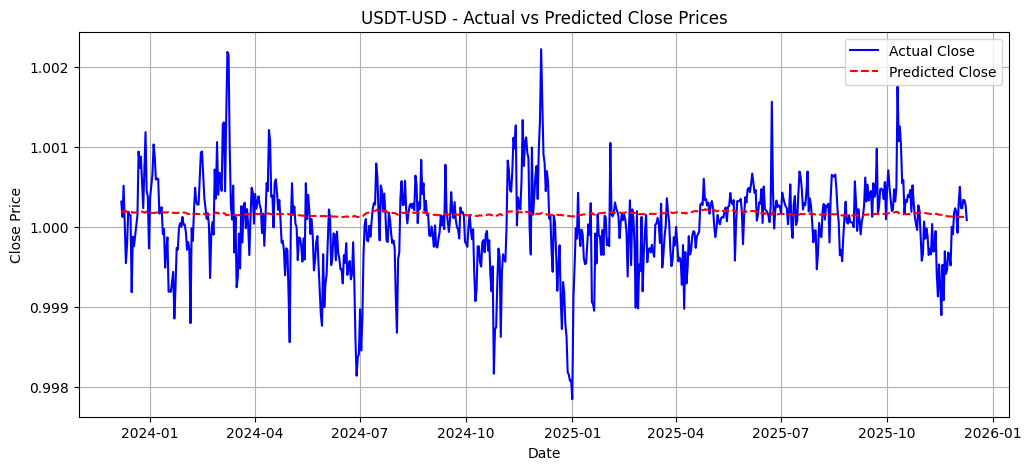

In [10]:
import os
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import ta  # pip install ta

# ------------------------------
# CONFIG
# ------------------------------
DATA_FOLDER = r"C:\Users\moham\Downloads\scrape\main\crypto_project\data\raw\ten_main_crytpo_10-12-2025"
FEATURES = ['EMA_200', 'RSI_14', 'EMA_50', 'EMA_20', 'ATR_pct']
TARGET = 'Close'
SEQ_LEN = 14
EPOCHS = 50
LR = 0.001
DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'

# ------------------------------
# Transformer Model
# ------------------------------
class TimeSeriesTransformer(nn.Module):
    def __init__(self, feature_size, seq_len=SEQ_LEN, num_layers=2, nhead=1, dropout=0.1):
        super().__init__()
        self.pos_encoder = nn.Parameter(torch.zeros(seq_len, feature_size))
        encoder_layer = nn.TransformerEncoderLayer(d_model=feature_size, nhead=nhead, dropout=dropout, batch_first=True)
        self.transformer_encoder = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)
        self.decoder = nn.Linear(feature_size, 1)

    def forward(self, x):
        x = x + self.pos_encoder
        x = self.transformer_encoder(x)
        return self.decoder(x[:, -1, :])

# ------------------------------
# Functions
# ------------------------------
def calculate_indicators(df):
    for col in ['Open','High','Low','Close','Volume']:
        df[col] = pd.to_numeric(df[col], errors='coerce')

    df['EMA_200'] = ta.trend.EMAIndicator(df['Close'], 200, fillna=True).ema_indicator()
    df['EMA_50'] = ta.trend.EMAIndicator(df['Close'], 50, fillna=True).ema_indicator()
    df['EMA_20'] = ta.trend.EMAIndicator(df['Close'], 20, fillna=True).ema_indicator()
    df['RSI_14'] = ta.momentum.RSIIndicator(df['Close'], 14, fillna=True).rsi()
    df['ATR'] = ta.volatility.AverageTrueRange(df['High'], df['Low'], df['Close'], 14, fillna=True).average_true_range()
    df['ATR_pct'] = df['ATR'] / df['Close'] * 100
    return df

def create_sequences(data, seq_len=SEQ_LEN):
    xs, ys = [], []
    for i in range(len(data) - seq_len):
        xs.append(data[i:i+seq_len])
        ys.append(data[i+seq_len, 0])
    return np.array(xs), np.array(ys)

# ------------------------------
# Select one crypto file
# ------------------------------
crypto_files = [f for f in os.listdir(DATA_FOLDER) if f.endswith("_daily_history.csv")]
file = crypto_files[8]  # only first file
crypto_name = file.replace("_daily_history.csv","")

df = pd.read_csv(os.path.join(DATA_FOLDER, file), parse_dates=['Date'])
df = df.sort_values('Date')

# Calculate indicators
df = calculate_indicators(df)
df = df.dropna(subset=FEATURES + [TARGET])

# Scale
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()
X_scaled = scaler_x.fit_transform(df[FEATURES])
y_scaled = scaler_y.fit_transform(df[[TARGET]])

data_combined = np.hstack([y_scaled, X_scaled])
X_seq, y_seq = create_sequences(data_combined, SEQ_LEN)
X_seq = X_seq[:, :, 1:]  # only features

# Convert to tensors
X_train = torch.tensor(X_seq, dtype=torch.float32).to(DEVICE)
y_train = torch.tensor(y_seq, dtype=torch.float32).unsqueeze(-1).to(DEVICE)

# ------------------------------
# Train model
# ------------------------------
model = TimeSeriesTransformer(feature_size=len(FEATURES)).to(DEVICE)
criterion = nn.MSELoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=LR)

for epoch in range(EPOCHS):
    model.train()
    optimizer.zero_grad()
    output = model(X_train)
    loss = criterion(output, y_train)
    loss.backward()
    optimizer.step()
    if (epoch+1) % 10 == 0:
        print(f"Epoch {epoch+1}/{EPOCHS}, Loss: {loss.item():.6f}")

# ------------------------------
# Predict next day
# ------------------------------
model.eval()
last_seq = X_seq[-1:]
with torch.no_grad():
    seq = torch.tensor(last_seq, dtype=torch.float32).to(DEVICE)
    pred_scaled = model(seq).cpu().numpy()
pred_next = scaler_y.inverse_transform(pred_scaled.reshape(-1,1))[0][0]

print(f"{crypto_name} next day predicted close: {pred_next:.6f}")

# ------------------------------
# Plot historical vs predicted
# ------------------------------
model.eval()
with torch.no_grad():
    X_all = torch.tensor(X_seq, dtype=torch.float32).to(DEVICE)
    preds_scaled = model(X_all).cpu().numpy()

# Inverse transform to original price scale
preds = scaler_y.inverse_transform(preds_scaled.reshape(-1,1)).flatten()
actual = df[TARGET].values[SEQ_LEN:]  # because first SEQ_LEN values are used for sequences
dates = df['Date'].values[SEQ_LEN:]

plt.figure(figsize=(12,5))
plt.plot(dates, actual, label='Actual Close', color='blue')
plt.plot(dates, preds, label='Predicted Close', linestyle='--', color='red')
plt.title(f'{crypto_name} - Actual vs Predicted Close Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()

### XRP-USD Ripple

c:\Users\moham\Downloads\scrape\main\crypto_project\venv\Lib\site-packages\torch\nn\modules\transformer.py:392: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.num_heads is odd
  warnings.warn(


Epoch 10/50, Loss: 0.043594
Epoch 20/50, Loss: 0.017943
Epoch 30/50, Loss: 0.019477
Epoch 40/50, Loss: 0.018621
Epoch 50/50, Loss: 0.016783
XRP-USD next day predicted close: 2.578189


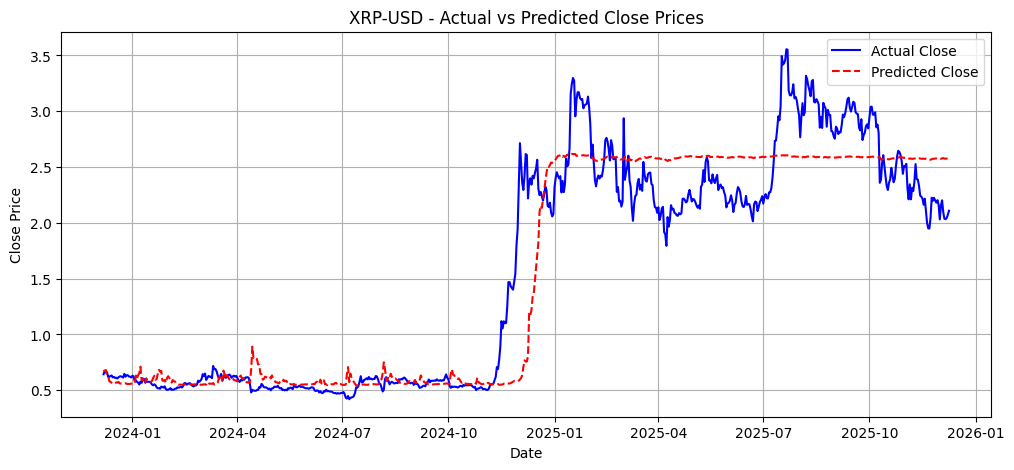

In [15]:
import os
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import ta  # pip install ta

# ------------------------------
# CONFIG
# ------------------------------
DATA_FOLDER = r"C:\Users\moham\Downloads\scrape\main\crypto_project\data\raw\ten_main_crytpo_10-12-2025"
FEATURES = ['EMA_200', 'RSI_14', 'EMA_50', 'EMA_20', 'ATR_pct']
TARGET = 'Close'
SEQ_LEN = 14
EPOCHS = 50
LR = 0.001
DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'

# ------------------------------
# Transformer Model
# ------------------------------
class TimeSeriesTransformer(nn.Module):
    def __init__(self, feature_size, seq_len=SEQ_LEN, num_layers=2, nhead=1, dropout=0.1):
        super().__init__()
        self.pos_encoder = nn.Parameter(torch.zeros(seq_len, feature_size))
        encoder_layer = nn.TransformerEncoderLayer(d_model=feature_size, nhead=nhead, dropout=dropout, batch_first=True)
        self.transformer_encoder = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)
        self.decoder = nn.Linear(feature_size, 1)

    def forward(self, x):
        x = x + self.pos_encoder
        x = self.transformer_encoder(x)
        return self.decoder(x[:, -1, :])

# ------------------------------
# Functions
# ------------------------------
def calculate_indicators(df):
    for col in ['Open','High','Low','Close','Volume']:
        df[col] = pd.to_numeric(df[col], errors='coerce')

    df['EMA_200'] = ta.trend.EMAIndicator(df['Close'], 200, fillna=True).ema_indicator()
    df['EMA_50'] = ta.trend.EMAIndicator(df['Close'], 50, fillna=True).ema_indicator()
    df['EMA_20'] = ta.trend.EMAIndicator(df['Close'], 20, fillna=True).ema_indicator()
    df['RSI_14'] = ta.momentum.RSIIndicator(df['Close'], 14, fillna=True).rsi()
    df['ATR'] = ta.volatility.AverageTrueRange(df['High'], df['Low'], df['Close'], 14, fillna=True).average_true_range()
    df['ATR_pct'] = df['ATR'] / df['Close'] * 100
    return df

def create_sequences(data, seq_len=SEQ_LEN):
    xs, ys = [], []
    for i in range(len(data) - seq_len):
        xs.append(data[i:i+seq_len])
        ys.append(data[i+seq_len, 0])
    return np.array(xs), np.array(ys)

# ------------------------------
# Select one crypto file
# ------------------------------
crypto_files = [f for f in os.listdir(DATA_FOLDER) if f.endswith("_daily_history.csv")]
file = crypto_files[9]  # only first file
crypto_name = file.replace("_daily_history.csv","")

df = pd.read_csv(os.path.join(DATA_FOLDER, file), parse_dates=['Date'])
df = df.sort_values('Date')

# Calculate indicators
df = calculate_indicators(df)
df = df.dropna(subset=FEATURES + [TARGET])

# Scale
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()
X_scaled = scaler_x.fit_transform(df[FEATURES])
y_scaled = scaler_y.fit_transform(df[[TARGET]])

data_combined = np.hstack([y_scaled, X_scaled])
X_seq, y_seq = create_sequences(data_combined, SEQ_LEN)
X_seq = X_seq[:, :, 1:]  # only features

# Convert to tensors
X_train = torch.tensor(X_seq, dtype=torch.float32).to(DEVICE)
y_train = torch.tensor(y_seq, dtype=torch.float32).unsqueeze(-1).to(DEVICE)

# ------------------------------
# Train model
# ------------------------------
model = TimeSeriesTransformer(feature_size=len(FEATURES)).to(DEVICE)
criterion = nn.MSELoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=LR)

for epoch in range(EPOCHS):
    model.train()
    optimizer.zero_grad()
    output = model(X_train)
    loss = criterion(output, y_train)
    loss.backward()
    optimizer.step()
    if (epoch+1) % 10 == 0:
        print(f"Epoch {epoch+1}/{EPOCHS}, Loss: {loss.item():.6f}")

# ------------------------------
# Predict next day
# ------------------------------
model.eval()
last_seq = X_seq[-1:]
with torch.no_grad():
    seq = torch.tensor(last_seq, dtype=torch.float32).to(DEVICE)
    pred_scaled = model(seq).cpu().numpy()
pred_next = scaler_y.inverse_transform(pred_scaled.reshape(-1,1))[0][0]

print(f"{crypto_name} next day predicted close: {pred_next:.6f}")

# ------------------------------
# Plot historical vs predicted
# ------------------------------
model.eval()
with torch.no_grad():
    X_all = torch.tensor(X_seq, dtype=torch.float32).to(DEVICE)
    preds_scaled = model(X_all).cpu().numpy()

# Inverse transform to original price scale
preds = scaler_y.inverse_transform(preds_scaled.reshape(-1,1)).flatten()
actual = df[TARGET].values[SEQ_LEN:]  # because first SEQ_LEN values are used for sequences
dates = df['Date'].values[SEQ_LEN:]

plt.figure(figsize=(12,5))
plt.plot(dates, actual, label='Actual Close', color='blue')
plt.plot(dates, preds, label='Predicted Close', linestyle='--', color='red')
plt.title(f'{crypto_name} - Actual vs Predicted Close Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()